In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -R /content/drive/MyDrive/Colab\ Notebooks/946/A2/twitter_user_data.csv ./

Mounted at /content/drive


<h2><center>CSCI446/946 Big Data Analytics</center></h2>
<h1><center>Assignment2</center></h1>
<center>Zihao Yao (6909796)</center>
<center>Jie Liu (7288839)</center>
<center>Can Liu (4701057)</center>
<center>Suna Wang (6943998)</center>
<center>Meiyun Deng (7113146)</center>
<center>Hancheng Cai (7080384)</center>

###Table of Contents
[1.Introduction](#scrollTo=_X_KGvehQABT)

[2.Problem Analysis](#scrollTo=8652FLJwQABU)

[3.Data Preparation](#scrollTo=4thuGVMVQABV)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Import libraries](#scrollTo=BNVtf69PBiql)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Load the dataset](#scrollTo=Sy7Uz8o3AD5E)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Data exploration and optimization](#scrollTo=yjSnhqibCGZs)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4 Text processing](#scrollTo=1hopPibZQABh)

[4.Clustering](#scrollTo=75VeWGyrXMjy)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1 kmeans](#scrollTo=v13hdrHyCD87)

[5.Association rules](#scrollTo=fskIslqGQABi)

[6.Classification](#scrollTo=T1sHum3cQABj)

[7.Comparison of misinformation](#scrollTo=YpmY4PBIQABj)

[8.Conclusion](#scrollTo=LNzrDopOQABj)



# 1 Introduction

This project designs a big data analytics lifecycle that aims to find misinformation on the social network, which mainly focuses on the distinguishment and amendment of human or non-human profiles. Twitter_user_data is used as the entire database for this project.  Various algorithms are applied to test if the profile is mistakenly recorded as human while the true identity of the profile belongs to a brand or vice versa. Relevant algorithms include but are not limited to logistic regression, association rules, clustering, classification, and text processing. It is expected that those algorithms can provide an identification prediction result for each profile in the database and amendment suggestions for switching between human and non-human profiles are also provided.



# 2 Problem Analysis



## 2.1 Purpose and Stakeholders Analysis

The purpose of finding out misinformation on social networks is to reduce relevant negative influences of misinformation on different stakeholders. For domain experts, the accuracy of the dataset is likely to provide better test results of algorithms. For company decision-makers, when designing marketing strategies, targeting the right group is always the most cost-effective and important thing to do. Consumers are regarded as the vulnerable group in current data metabolism. They are usually categorized into certain groups in the information network, for example, one can be labeled as having a ‘weak immune system’ if his or her posts are always complaining about getting sick or going to hospitals. By having certain labels, the user may suffer higher exposure to health products, insurance products, and other commercial promotions.  By having these unconscious labels, consumers are facing threats of being commercial targets and losing choices of additional information. As a result, reducing data misinformation is regarded as a vital step for further data mining procedures.
In the Discovery phase, cells with a null value in the dataset are identified and handled properly. Despite the missing values being regarded as part of misinformation, gender information recorded in the raw data is also challenged as our null hypothesis of the project is “There exists misinformation in gender column that human or non-human information recorded in the wrong category”. The project is designed as a vital activity in commercial advertising. By helping companies to distinguish human and non-human accounts, companies are more likely to launch product advertisements to human groups. In this way, companies can save costs on advertisements and receive more efficient responses from the market as companies aiming businesses to customers lay more focus on the customers' end. The targeted marketing group is designed to be human.


## 2.2 Designed misinformation analytics lifecycle

In the discovery phase, the domain of the project is firstly identified. The three main stakeholders of gender recognition and misinformation are research experts, consumers, and companies. Companies are classified as the main stakeholders in this project. The negative influences of misinformation on various stakeholders are verified. The characteristics of human and non-human behaviors are used as hypotheses in this project.

In data preparation phase, distracting data, duplicate data and outliers are discovered and removed. As the project is designed to discover gender of different users, columns related to golden standard are regarded as irrelevant and removed from the dataset. Data columns lack of meaningfulness are also dropped such as twitter_id and user_id. Further, missing values are handled by dropping or filling in meaningful values. Columns which requries normalization are properly dealt with. For color and text content processing, color hex values are transferred to RGB values so as the punctuations of text, short words, and stop words are removed.  

In the model planning phase, the project uses the K-means algorithm to cluster the dataset which is 'human' and 'non-human'. And also, visualization of digital features and text features are considered helpful tools in demonstrating the features of different columns as well as frequently used text cloud in various tweets. Cells with confidence equal one in both association rule and in column 'gender: confidence' is then used as a training dataset aligning the concept of the Vann Diagram. Use logistic regression and Naive Bayes classification algorithms to train the data. Compare the performance of both algorithms to use the better model for further research. Use the model to predict the gender of the test dataset. If the predicted value is not aligned with the original gender information, it will be classified as potential misinformation. The association rule is then used to determine whether this misinformation exists.

In the model building phase, data is split to training and test sets. Logistic Regression and Naive Bayes are used to do data classification. Confusion matrix is expected to provide informaiton regarding to prediction precision.  

The project results are expected to successfully classify different profile gender. Any existence of misinformation can be traced and handling opinions will be provided both in discussion part of the report as well as in the presentation.

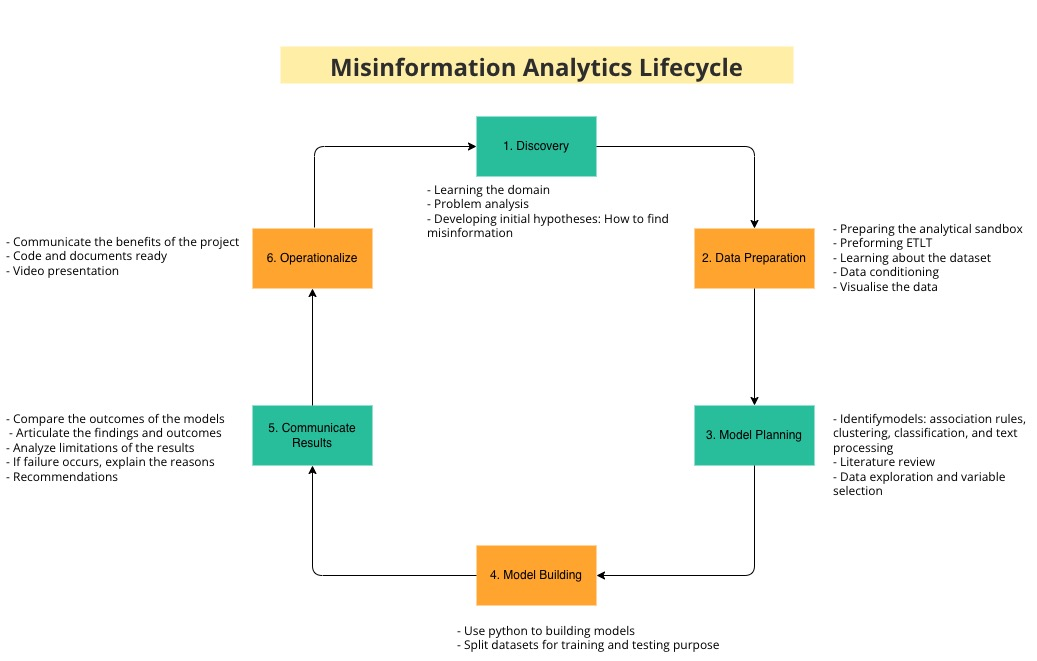


## 2.3 Hypotheses about misinformation

Twitter is one of the popular social media platforms nowadays. Some Twitter users are individuals while some are organizations. Human and brand profiles are supposed to have different features. The profile features provided in the twitter_user_data are utilized to predict the user gender and then the gender misinformation is found. In the designed hypotheses, a human and brand Twitter profile should be distinguishable in the following aspects:

**a**. The description of the profile in the tweet also makes a good distinction between human and non-human. For example, when the text description covers words such as "I", "Love", etc., the account is more likely to be human, and if the text description contains words such as "Target", "Customer", etc. When the account is a brand account, the probability is higher.

**b**. Humans are more subject to color choices. Humans tend to prefer bright and splendid colors, while non-humans tend to prefer single-shade, solemn colors. The diversity of color choices and choice of shades of color in the sidebar and link color of the profile may provide useful information for human or non-human prediction

**c**. The number of tweets per day is also a good yardstick to differentiate between humans and non-humans. For humans, the number of tweets per day is limited and the frequency is relatively low. For brands, the number of tweets determines their attention and popularity. The more the number of tweets, the higher the evaluation rate of sending tweets. For brands, it is to increase the exposure and popularity of their own brands.

**d**. Twitter-like counts, ie. fav_number is also an area of interest in this gender classification project. Tweet uses algorithms to send trending topics to users. These algorithms have the ability to guess users' potential interesting topics. It is human behavior to like the posts and retweets them. Brands are less likely to follow other topics. It is expected that among top-like counts, more human accounts shall be found.

**e**. Humans and non-humans can also be distinguished from the user's name. Generally speaking, human usernames will be more personal and can highlight what they want to express, so the names will be more casual or use unconventional names. However, the brand account will take some positive or official names for the brand's popularity or image.


**f**. For humans, tweets are a window to express emotions. The content of tweets may be positive or negative, but they all have their own emotions in them. But for brands, positive or neutral tweet texts are used to create a more positive image for the company.

**g**. Natural language used in each tweet is also evaluated as the main distinguishment between humans and non-humans.  It is expected that more emotional phrases and more oral common words are used in human user profiles while more academic and frequently used marketing phases are used by brand profiles.



*italicized text*# 3 Data Preparation


## 3.1 Import libraries
Before we preprocessed and analyzed the data, we imported the necessary libraries first. The following code cell imported all libraries we need for the whole project.

In [ ]:
# Import necessary libraries
from collections import Counter
from datetime import datetime, date

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel

from IPython import display

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.transforms import interval_contains_open
%matplotlib inline

!pip install missingno
import missingno as msno

!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import os
import pandas as pd
from pprint import pprint
import re

import scipy as sp
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cdist

import seaborn as sns

import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import StandardScaler, label_binarize, LabelBinarizer
from sklearn import model_selection
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve,auc, recall_score,roc_auc_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import string

!pip install textblob
from textblob import TextBlob
!pip install wordcloud
from wordcloud import WordCloud
!pip install xgboost
from xgboost import XGBClassifier

# spacy for lemmatization
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this

import logging

import warnings
warnings.filterwarnings("ignore")


## 3.2 Load the dataset
After we imported all libraries, we used read_csv() function with parameter "encoding = 'latin1'" to load the dataset and store it into the variable "original_data". After that we checked the basic information about the dataset. From the following codes, we found that the dataset contains 20050 rows and 26 columns, and there are seventeen columns of objects , five columns of int64 data, three columns of float64 data and one column of boolean data.

In [ ]:
# Input Twitter_user_data Dataset
# Next, we ask our libraries to read the target dataset and display the head of it
original_data = pd.read_csv('twitter_user_data.csv', encoding='latin1')
original_data.head()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

          created  ...                                       profileimage  \
0    12/5/13 1:48  ...  https://pbs.twimg.com/profile_images/414342229...   
1   10/1/12 13:51  ...  https://pbs.twimg.com/profile_images/539604221...   
2  11/28/14 11:30  ...  https://pbs.twimg.com/profile_images/657330418...   
3   6/11/09 22:39  ...  https://pbs.twimg.com/profile_images/259703936...   
4   4/16/14 13:23  ...  https://pbs.twimg.com/profile_images/564094871...   

   retweet_count sidebar_color  \
0              0        FFFFFF   
1              0        C0DEED   
2              1        C0DEED   
3              0        C0DEED   
4              0             0   

                                                text tweet_coord tweet_count  \
0  Robbie E Responds To Critics After Win Against...         NaN      110964   
1  ÛÏIt felt like they were my friends and I was...         NaN        7471   
2  i absolutely adore when louis starts the songs...         NaN        5617   
3  Hi @JordanSpieth - Looking at the url - do you...         NaN        1693   
4  Watching Neighbours on Sky+ catching up with t...         NaN       31462   

    tweet_created      tweet_id   tweet_location               user_timezone  
0  10/26/15 12:40  6.587300e+17  main; @Kan1shk3                     Chennai  
1  10/26/15 12:40  6.587300e+17              NaN  Eastern Time (US & Canada)  
2  10/26/15 12:40  6.587300e+17           clcncl                    Belgrade  
3  10/26/15 12:40  6.587300e+17    Palo Alto, CA  Pacific Time (US & Canada)  
4  10/26/15 12:40  6.587300e+17              NaN                         NaN  

[5 rows x 26 columns]

In [ ]:
# In the following 2 steps,
# we will have a general idea of the shape
# and the data type of the dataset
original_data.shape

(20050, 26)

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

## 3.3 Data exploration and optimization
In order to build a better model for finding misinformation, we removed the distractive data and kept effective data as much as possible.

In this part, we explored the dataset to locate the missing values or invalid values, checked for the duplicates, dropped redundant columns, transfered data where needed and processed text related data. We tried hard to dig deeper into the available data and tried to make full use of them. More details of the data exploration and processes will be discussed later.

### 3.3.1 Remove gold standard related columns
Because this project is to build models to find and identify the mistakely recorded human or non-human profiles over the *twitter_user_data* dataset, we are going to drop some columns that are created by former analysts. According to the Twitter User Data instruction file and the dataset, there are 9 columns linked to gold standard. Gold standard are built to analyze the dataset by other analysts.(Sayyadiharikandeh, Luca Ciampaglia and Flammini, n.d.) Therefore, we dropped most of these columns first. Columns dropped are *_golden*, *_unit_state*, *_trusted_judgments*,*_last_judgment_at*, *profile_yn*, *profile_yn:confidence*, *gender_gold,* and *profile_yn_gold*. We kept *gender:confidence* for future comparision and testing. We stored the new dataset into the df DataFrame.

In [ ]:
# drop the unnecessary columns
df = original_data.drop(['_golden', '_unit_state', '_trusted_judgments','_last_judgment_at', 'profile_yn', 'profile_yn:confidence', 'gender_gold', 'profile_yn_gold'],axis=1)


### 3.3.2 Check the duplicates
We used the following code to check for duplicates. If there are some duplicates, we will delete the duplicate data to reduce the redundant data. From the following result, we didn't find any duplicated data, hence we can remove some id related columns later.

In [ ]:
# check the duplicates of the dataset, there is no duplicates
df.duplicated().sum()

0

### 3.3.3 Remove _unit_id and tweet_id Columns
In terms of  *_unit_id* and *tweet_id* columns, each datum in *_unit_id* is just a unique id, each datum in *tweet_id* is a random id for the random tweet, and all tweet_id data seem to be the same in this dataset. From our perspective, these columns contribute nothing to misinformation detecting, so we dropped them.

In [ ]:
# drop the _unit_id and tweet_id columns
df = df.drop(['_unit_id','tweet_id'],axis=1)

### 3.3.4 Check the missing values
In this part we checked the missing values. From the data and diagram displayed, there are 97, 26, 3744, 19891, 7484 and 7798 lines of data that are missing in *gender*, *gender:confidence*, *description*, *tweet_coord*, *tweet_location* and *user_timezone* respectively. We will process them in fllowing parts.

The sum of NaN data in each column:
 gender                  97
gender:confidence       26
created                  0
description           3744
fav_number               0
link_color               0
name                     0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_coord          19891
tweet_count              0
tweet_created            0
tweet_location        7484
user_timezone         7798
dtype: int64


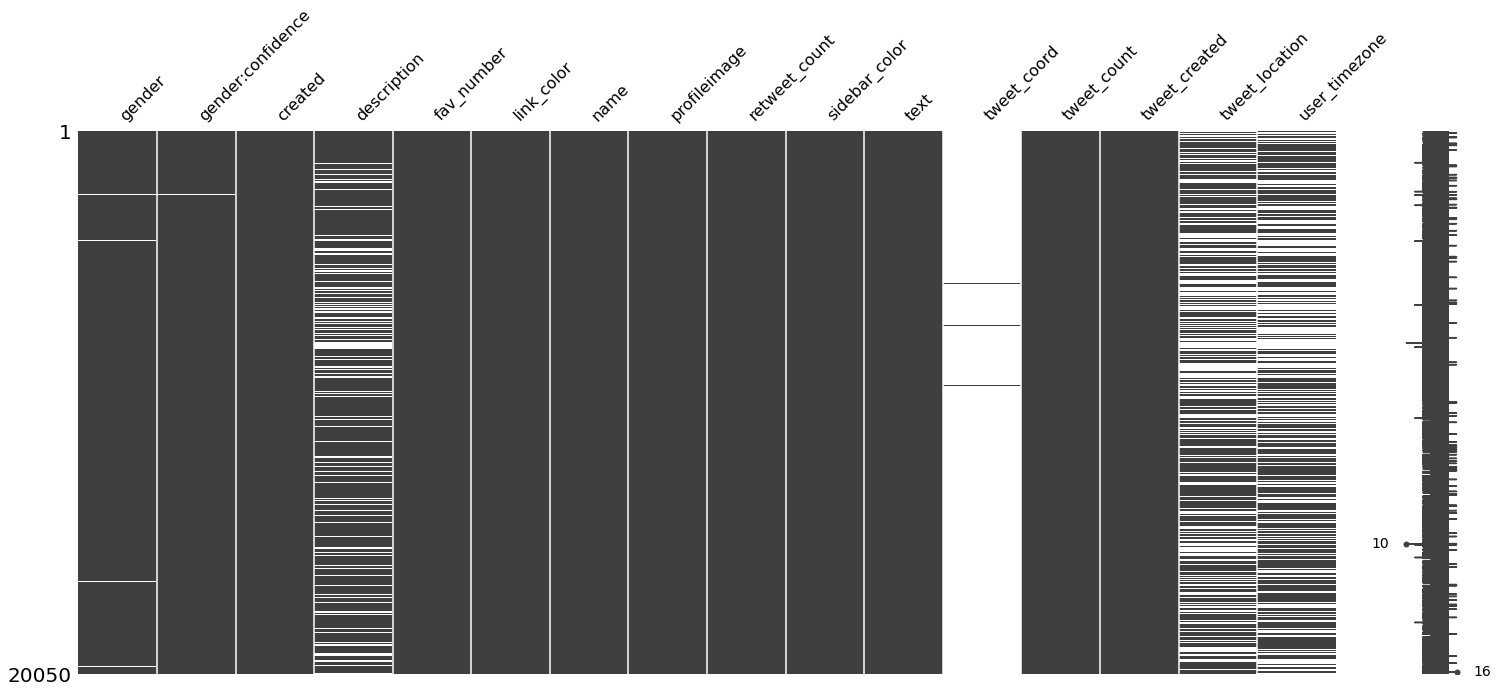

In [ ]:
# check the NaN value data for each column
print('The sum of NaN data in each column:\n',df.isna().sum())
# display the distribution of the missing value
msno.matrix(df)

### 3.3.5 Drop or fill some of the missing values
Combined the upper results, we dropped the null and void gender data and dropped the data of unknown gender.

In [ ]:
# drop data where gender is NaN
df.dropna(subset=['gender'],inplace=True)

We checked that there are four types of gender recorded in the dataset. They are female, male, brand and unknown. For the data marked with unknown gender, it seems that we did not get enough information whether to catagorize them into human or non-human later for misinformation matching. So, we removed them.

In [ ]:
# check the gender type and corresponding amount
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [ ]:
# among the existing data, 1117 data of unknown gender value
# drop data of gender with unknown values
df = df[~df['gender'].isin(['unknown'])]

For the missing values in description, *tweet_location* and *user_timezone*, we supposed that account owners didn't set any account description and they didn't share the location. For the timezone, maybe the machine didn't work properly to get the account's timezone. Then we filled the null description with '' instead of inputing some text content like 'no description'to avoid influencing the result of text processing. For the location, we filled the missing value with '' as well. For the *user_timezone*, we wanted to use them later, so we transfered them to 0, and we will transfer the rest to 1 later.

In [ ]:
# fill NaN value of user_timezone with ""
df['description'] = df['description'].fillna('')

In [ ]:
# fill NaN value of tweet_location with ""
df['tweet_location'] = df['tweet_location'].fillna('')

In [ ]:
# fill NaN value of user_timezone with 0
df['user_timezone'] = df['user_timezone'].fillna(0)

### 3.3.6 Remove tweet_coord, tweet_location columns
From the missing value-counts and distribution, there are over 19890 lines of data which have no *tweet_coord* information. So, we dropped the *tweet_coord* column directly.

In [ ]:
# drop the tweet_coord column
df = df.drop(['tweet_coord'],axis=1)

Furthermore, we checked the information in *tweet_location* column, from the latter result, it seems that data in *tweet_location* column is not normalized. For the time being we cannot make use of the data, so we dropped this column as well.

In [ ]:
# check data in tweet_location column
df[df['tweet_location'] != ''].groupby('tweet_location')['tweet_location'].count()

tweet_location
                                                     7
          ª_ ªÁ ª¢ ª¤                            1
     ts,ed,1d                                        1
  Delaware                                           1
 #B2BHOUR å© Ïä                                     1
                                                    ..
ë£ë                                                 1
ìÙGë±Gë±lÌ¢_üdië±÷¨4 Fë±_üsÏ                      1
ô ¯¤¯øô_ ¯¤ôãô ¯µôÔ¯±.                               1
ôÉô_¯¼¯¤ô  _ü                                    1
ôã¯¤ ¯_ô ô_ ôöôã¯¤ ¯«ô_¯_ô_ ¯¬ôã ôÉ¯_ôãôÉ ôôâ¯á     1
Name: tweet_location, Length: 7538, dtype: int64

From the result of upper code, it seems that data in *tweet_location* column is not normalized. Because we couldn't make use of the low quality data in *tweet_location* column, we dropped this column.

In [ ]:
# drop the tweet_location column
df = df.drop(['tweet_location'],axis=1)

In [ ]:
# confirm that there is no missing values
df.isna().sum().sum()

0

### 3.3.7 Explore the time related columns
In this part, we explored the time related columns, *tweet_created* and *created*. There are five time categories over *tweet_created*, but they are all in one day. From the results, tweets were created around 12:40 or 13:20. Small differences between the total amounts in different hours. From this column, we couldn't get enough information, so we stored the last time stamp and dropped the *tweet_created* column. After that, we used the time stamp and data of *created* column to do more analysis.

In [ ]:
# Unify the format in tweet_created coulumn
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
# count the tweet number created in different time
df['tweet_created'].value_counts()

2015-10-26 12:40:00    7560
2015-10-26 13:19:00    5556
2015-10-26 13:20:00    3677
2015-10-26 12:39:00    1800
2015-10-26 13:18:00     243
Name: tweet_created, dtype: int64

In [ ]:
# store the latest tweet-created time for further analysis
end_time = df['tweet_created'].max()

In [ ]:
# There are only five time categories, and all of them are in one day
# drop the tweet_created column
df = df.drop(['tweet_created'],axis=1)

In the following steps, we unified the data in the *created* column, and created a histogram to see the distribution of the profile created in different years. From the histogram below, the dataset contains partial data created from 2007 to 2015. In 2007 and 2008, less then 250 profiles were created each year. The major profiles were created from 2009 with an average amount around 2000 each year to 2014. There were over 3000 and over 3500 profiles were created in 2014 and 2015. We calculated the daily tweet amount for each data and created a plot. It's obvious that most accounts have less than 250 tweets a day.

In [ ]:
# unify the created column
df['created'] = pd.to_datetime(df['created'])

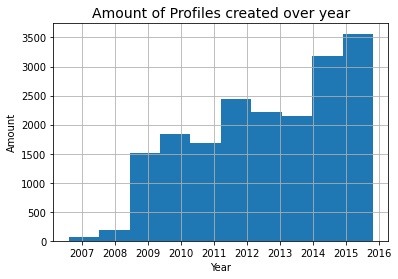

In [ ]:
# create a histogram to visualize the amount of profiles created over year
df['created'].hist(figsize=(6,4))
plt.title("Amount of Profiles created over year", fontdict={'fontsize':14})
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

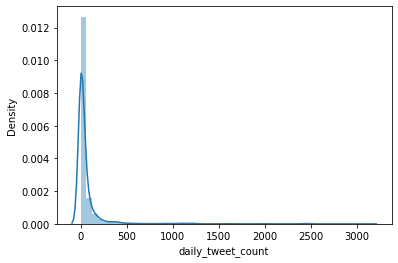

In [ ]:
# calculate the length of datetime differences between the created and the end datetime
df['delta'] = ((end_time - df['created']) / pd.Timedelta(1, 'D')).fillna(0).astype(int)
# df['delta']
# calculate the frequency of tweet each day for each account
df['daily_tweet_count'] = (df['tweet_count'] / df['delta']).replace(np.inf,0).fillna(0).astype(int)
# df['daily_tweet_count'].value_counts()
sns.distplot(df.daily_tweet_count)

### 3.3.8 Remove the retweet_count column
We tried to make use of the *retweet_count* column in our project, but we found that over 18200 data haven't been retweeted. That means less than 10% data have been retweeted. We checked data that were retweeted over 10 times, and we found that, among the 14 data, there are 6 tweets created by non-human and  8 by human. All above, we think the *retweet_count* may reduce the accuracy of the model, so we dropped *retweet_count* column.

In [ ]:
# check the retweet_count amount over different retweet_count values
df['retweet_count'].value_counts()

0      18243
1        476
2         54
3         17
6          8
5          7
4          6
7          5
8          3
20         2
11         2
10         2
12         2
23         1
15         1
13         1
153        1
49         1
9          1
330        1
36         1
19         1
Name: retweet_count, dtype: int64

In [ ]:
# count the amount of retweet_count greater than 10 over gender
df[df.retweet_count > 10].groupby(['gender'])['retweet_count'].count()

gender
brand     6
female    3
male      5
Name: retweet_count, dtype: int64

In [ ]:
# drop the retweet_count column
df = df.drop('retweet_count',axis=1)

### 3.3.9 Remove the profileimage column
For the data in profileimage column,we want to use them to improve the accuracy of gender classifier. We tried to download and analyze them, but we failed for some reason. After processing the code below, all data were deleted unexpectedly. If we want to use the image data, it might take more time for us to process the image data, so we finally decided to drop the column.

In [ ]:
# import os
# import io
# def check_profile_image(img_link):
#     """
#         check the validity of the image link
#         download the image if the link is reachable
#     """
#     save_image_path = ''
#     # the valid images should be one of these file types
#     valid_img_ext_lst = ['.jpeg', '.png', '.jpg']
#     count = 0
#     try:
#         img_data = io.imread(img_link)
#         image_name = img_link.rsplit('/')[-1]
#         if any(valid_img_ext in image_name.lower() for valid_img_ext in valid_img_ext_lst):
#             save_image_path = os.path.join('./img/', image_name)
#             io.imsave(save_image_path, img_data)
#     except:
#         # print('Invalid image link {}'.format(img_link))
#         count+=1
#     print('count: {} '.format(count))
#     return save_image_path
# # print('Loading...')
# saved_img_s = df['profileimage'].apply(check_profile_image)
# print(saved_img_s.shape)
# df['saved_image'] = saved_img_s
# # filter those data with invalid link
# df = df[df['saved_image'] != '']


In [ ]:
# drop the profileimage column
df = df.drop('profileimage',axis=1)

### 3.3.10 Transfer the gender
In this part, data in *gender* column were transformed into human by 0 and non-human by 1. The column of *user_timezone* is not original NaN were transformed into 1.

In [ ]:
# in this project we are going to find out the misinformation of human and non-human
# we take the gender of female and male as the human information(labeled them with 0)
# and the gender of brand as the non-human(label them with 1)
df['gender_trans'] = df['gender']
df['gender_trans'].replace({'male':0},inplace=True)
df['gender_trans'].replace({'female':0},inplace=True)
df['gender_trans'].replace({'brand':1},inplace=True)
# count the data by different categories
df['gender_trans'].value_counts()

0    12894
1     5942
Name: gender_trans, dtype: int64

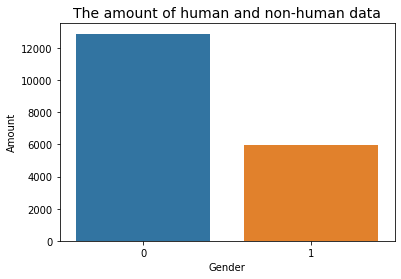

In [ ]:
# create a countplot to visualize the amount of human and non-human data
sns.countplot(df['gender_trans'])
plt.title("The amount of human and non-human data", fontdict={'fontsize':14})
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

### 3.3.11 Transfer the user_timezone column

In [ ]:
# transfer the data in user_timezone column into 1 if data existing
df['user_timezone'] = df['user_timezone'].apply(lambda x: 0 if x==0 else 1 )
# count the data by different categories
df['user_timezone'].value_counts()

1    11653
0     7183
Name: user_timezone, dtype: int64

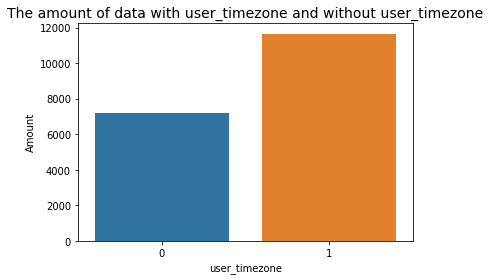

In [ ]:
# create a countplot to visualize the amount of data with or without user_timezone
sns.countplot(df['user_timezone'])
plt.title("The amount of data with user_timezone and without user_timezone", fontdict={'fontsize':14})
plt.xlabel('user_timezone')
plt.ylabel('Amount')
plt.show()

### 3.3.12 Categorize the fav_number, tweet_count and daily_tweet_label columns
In this part, we categorized *fav_number*, *tweet_count* and  *daily_tweet_count* data into different groups by average amount for model building. We used the border number according to the data description. The border numbers is 0, number of account amount reached 25%, 50% or 75% and number around the max. So, the three colomns are divided into four categories seperately. The *fav_number* column has categories of [0,13), [13,482), [482,3375) and [3375,342000) that are labeled with 0, 1, 2, 3 respectively. The *tweet_count* column has categories of [0,2399), [2399,11312), [11312,39793) and [39793,2690000) that are labeled with 0, 1, 2, 3 respectively. The  *daily_tweet_count* column has the categories of [0,3), [3,12), [12,47) and [47,3200) that are labeled with 0, 1, 2, 3 respectively.

In [ ]:
df.describe()

gender:confidence     fav_number   tweet_count  user_timezone  \
count       18836.000000   18836.000000  1.883600e+04   18836.000000   
mean            0.900997    4413.461563  3.913570e+04       0.618656   
std             0.172980   12468.532705  1.191306e+05       0.485730   
min             0.314000       0.000000  1.000000e+00       0.000000   
25%             0.686475      13.000000  2.399750e+03       0.000000   
50%             1.000000     482.500000  1.131250e+04       1.000000   
75%             1.000000    3375.500000  3.979350e+04       1.000000   
max             1.000000  341621.000000  2.680199e+06       1.000000   

              delta  daily_tweet_count  gender_trans  
count  18836.000000       18836.000000  18836.000000  
mean    1158.596995          70.214217      0.315460  
std      792.522355         222.502867      0.464711  
min        0.000000           0.000000      0.000000  
25%      459.000000           3.000000      0.000000  
50%     1099.000000          12.000000      0.000000  
75%     1774.000000          47.000000      1.000000  
max     3368.000000        3119.000000      1.000000

In [ ]:
# fav_number are divided into [0,13),[13,482),[482,3375) and [3375,342000)
# fav_number categories are labeled with 0, 1, 2, 3 respectively
# tweet_count are divided into [0,2399),[2399,11312),[11312,39793) and [39793,2690000)
# tweet_count categories are labeled with 0, 1, 2, 3 respectively
# daily_tweet_count are divided into [0,3),[3,12),[12,47) and [47,3200)
# daily_tweet_count categories are labeled with 0, 1, 2, 3 respectively
df['fav_label'] = pd.cut(x=df['fav_number'],bins=[0,13,482,3375,342000],labels=[0,1,2,3],right=False)
df['tweet_label'] = pd.cut(x=df['tweet_count'],bins=[0,2399,11312,39793,2690000],labels=[0,1,2,3],right=False)
df['daily_tweet_label'] = pd.cut(x=df['daily_tweet_count'],bins=[0,3,12,47,3200],labels=[0,1,2,3],right=False)

# change the data type of the labeled fav_label, tweet_label and daily_tweet_label
df['fav_label']=df['fav_label'].astype('int64')
df['tweet_label']=df['tweet_label'].astype('float64')
df['daily_tweet_label']=df['daily_tweet_label'].astype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3d99bd690>,
      dtype=object)

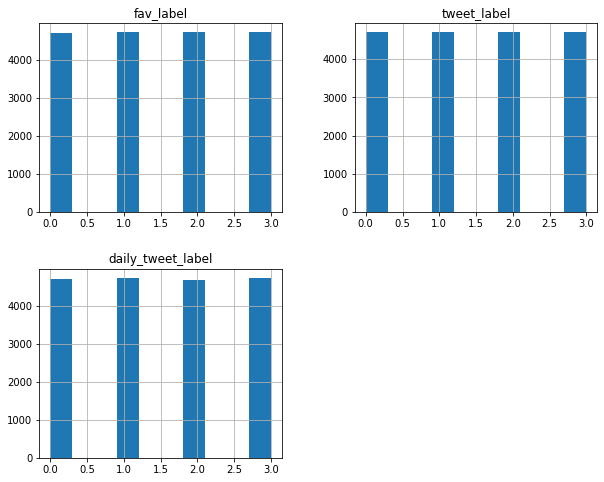

In [ ]:
# use histograms check the distribution of data
show_hist = df[['fav_label','tweet_label','daily_tweet_label']]
show_hist.hist(figsize=(10,8))

### 3.3.13 Explore the color related columns
In this part, we tried to unify the format of color columns and transfered the color type from Hex to RGB. After that, we analyzed the relationship between the color temperature and non-human data or human data. From the following result, we found that human data uses more warm colors in their link color and sidebar color settings.

In [ ]:
# define the function to unify the data of color
def is_hex(s):
  hex_digits = set(string.hexdigits)
  # if s is long, then it is faster to check against a set
  return all(c in hex_digits for c in s)

In [ ]:
# define the function to change the form of color into RGB
def tf_tgb(hex):
  value = list(int(hex[i:i + 2], 16) for i in range(0, 6, 2))
  return np.array(value)

In [ ]:
# unify the data and transfer the hex value to RGB value

# unify the data
df = df[df['link_color'].str.len() == 6]
df = df[df['sidebar_color'].str.len() == 6]
df.drop(df[df['link_color'].apply(lambda x:is_hex(x)== False)].index, inplace= True)
df.drop(df[df['sidebar_color'].apply(lambda x:is_hex(x)== False)].index, inplace= True)

df = df.reset_index(drop=True)

# get the RGB data of link_color and sidebar_color
print('get the RGB data of link_color...')
df['link_color_rgb'] = df['link_color'].apply(lambda x:tf_tgb(x))
df['link_color_r'] = df['link_color_rgb'].apply(lambda x:x[0])
df['link_color_g'] = df['link_color_rgb'].apply(lambda x:x[1])
df['link_color_b'] = df['link_color_rgb'].apply(lambda x:x[2])

print('get the RGB data of sidebar_color...')
df['sidebar_color_rgb'] = df['sidebar_color'].apply(lambda x: np.array(tf_tgb(x)))
df['sidebar_color_r'] = df['sidebar_color_rgb'].apply(lambda x:x[0])
df['sidebar_color_g'] = df['sidebar_color_rgb'].apply(lambda x:x[1])
df['sidebar_color_b'] = df['sidebar_color_rgb'].apply(lambda x:x[2])
df.head()

get the RGB data of link_color...
get the RGB data of sidebar_color...


gender  gender:confidence             created  \
0   male             1.0000 2013-12-05 01:48:00   
1   male             1.0000 2012-10-01 13:51:00   
2   male             0.6625 2014-11-28 11:30:00   
3   male             1.0000 2009-06-11 22:39:00   
4   male             1.0000 2012-12-03 21:54:00   

                                         description  fav_number link_color  \
0                              i sing my own rhythm.           0     08C2C2   
1  I'm the author of novels filled with family dr...          68     0084B4   
2                louis whining and squealing and all        7696     ABB8C2   
3  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...         202     0084B4   
4    The secret of getting ahead is getting started.          80     0000FF   

             name sidebar_color  \
0         sheezy0        FFFFFF   
1     DavdBurnett        C0DEED   
2  lwtprettylaugh        C0DEED   
3     douggarland        C0DEED   
4      RobinMeske        C0DEED   

                                                text  tweet_count  ...  \
0  Robbie E Responds To Critics After Win Against...       110964  ...   
1  ÛÏIt felt like they were my friends and I was...         7471  ...   
2  i absolutely adore when louis starts the songs...         5617  ...   
3  Hi @JordanSpieth - Looking at the url - do you...         1693  ...   
4  Gala Bingo clubs bought for å£241m: The UK's l...       112117  ...   

   tweet_label  daily_tweet_label   link_color_rgb  link_color_r  \
0          3.0                  3    [8, 194, 194]             8   
1          1.0                  1    [0, 132, 180]             0   
2          1.0                  2  [171, 184, 194]           171   
3          0.0                  0    [0, 132, 180]             0   
4          3.0                  3      [0, 0, 255]             0   

   link_color_g  link_color_b  sidebar_color_rgb sidebar_color_r  \
0           194           194    [255, 255, 255]             255   
1           132           180    [192, 222, 237]             192   
2           184           194    [192, 222, 237]             192   
3           132           180    [192, 222, 237]             192   
4             0           255    [192, 222, 237]             192   

   sidebar_color_g  sidebar_color_b  
0              255              255  
1              222              237  
2              222              237  
3              222              237  
4              222              237  

[5 rows x 25 columns]

In [ ]:
# RGB of red color is（R = 255，G = 0，B = 0）
# RGB of blue color is（R = 0，G = 0，B = 255）
# We assume that if the value of R is greater thhan B, the color is more warmer
# count the amount of warm link color used in human and non-human accounts
df['link_color_warm'] = df.apply(lambda x : 0 if x['link_color_b'] > x['link_color_r'] else 1,axis = 1)
df['link_color_warm'].value_counts()


0    11352
1     2551
Name: link_color_warm, dtype: int64

In [ ]:
# count the amount of warm sidebar color used in human and non-human accounts
df['sidebar_color_warm'] = df.apply(lambda x : 0 if x['sidebar_color_b'] > x['sidebar_color_r'] else 1,axis = 1)
df['sidebar_color_warm'].value_counts()


0    9582
1    4321
Name: sidebar_color_warm, dtype: int64

### 3.3.14 Detect outliers
In this part, we removed some outliers that may affect the accuracy of our future models. We created boxplots of columns of *fav_number*, *tweet_count* and *daily_tweet_count* by gender to detect those outliers. From the plots, data that have *fav_number* over 300000, *tweet_count* over 2000000 or *daily_tweet_count* over 3000 might be outliers. We checked these data, and finally dropped them.

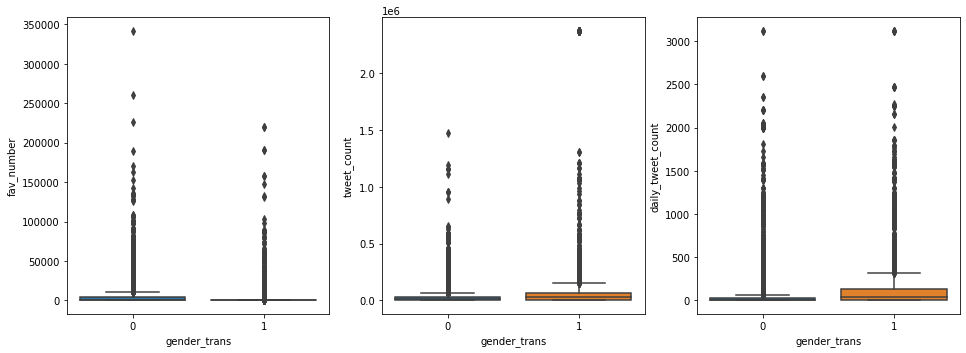

In [ ]:
plt.figure(figsize=[16,12])
# Boxplot of fav_number by gender
plt.subplot(231)
sns.boxplot(x='gender_trans', y='fav_number', data=df)

# Boxplot of tweet_count by gender
plt.subplot(232)
sns.boxplot(x='gender_trans', y='tweet_count', data=df)

# Boxplot of daily_tweet_count by gender
plt.subplot(233)
sns.boxplot(x='gender_trans', y='daily_tweet_count', data=df)

plt.show()

In [ ]:
df[df.fav_number > 300000]

gender  gender:confidence             created  \
2063  female                1.0 2013-03-24 21:07:00   

                                            description  fav_number  \
2063  Christian Disney Musical geek who dreams of im...      341621   

     link_color            name sidebar_color  \
2063     E063EB  ariel_thethird        FFFFFF   

                                                   text  tweet_count  ...  \
2063  @MarziaPie and your hair looks so cute in the ...       236509  ...   

      link_color_rgb  link_color_r  link_color_g  link_color_b  \
2063  [224, 99, 235]           224            99           235   

      sidebar_color_rgb  sidebar_color_r  sidebar_color_g sidebar_color_b  \
2063    [255, 255, 255]              255              255             255   

      link_color_warm  sidebar_color_warm  
2063                0                   1  

[1 rows x 27 columns]

In [ ]:
df = df[ df.fav_number < 300000]

In [ ]:
df[ df.tweet_count > 2000000]

gender  gender:confidence             created  \
2721  brand             1.0000 2010-07-06 13:21:00   
2845  brand             1.0000 2010-07-06 13:21:00   
2890  brand             0.6561 2010-07-06 13:21:00   
2938  brand             1.0000 2010-07-06 13:21:00   
3114  brand             1.0000 2010-07-06 13:21:00   
3183  brand             1.0000 2010-07-06 13:21:00   
3238  brand             1.0000 2010-07-06 13:21:00   
3286  brand             1.0000 2010-07-06 13:21:00   
3364  brand             0.6509 2010-07-06 13:21:00   
3487  brand             1.0000 2010-07-06 13:21:00   
3552  brand             1.0000 2010-07-06 13:21:00   
3673  brand             1.0000 2010-07-06 13:21:00   
3831  brand             1.0000 2010-07-06 13:21:00   
3902  brand             1.0000 2010-07-06 13:21:00   
4060  brand             1.0000 2010-07-06 13:21:00   
4183  brand             1.0000 2010-07-06 13:21:00   
4439  brand             1.0000 2010-07-06 13:21:00   
4603  brand             0.6483 2010-07-06 13:21:00   
4816  brand             1.0000 2010-07-06 13:21:00   
4911  brand             1.0000 2010-07-06 13:21:00   
5004  brand             1.0000 2010-07-06 13:21:00   
5063  brand             1.0000 2010-07-06 13:21:00   
5124  brand             1.0000 2010-07-06 13:21:00   
5293  brand             1.0000 2010-07-06 13:21:00   

                                            description  fav_number  \
2721  The Map Game is a free geography quiz based on...           1   
2845  The Map Game is a free geography quiz based on...           1   
2890  The Map Game is a free geography quiz based on...           1   
2938  The Map Game is a free geography quiz based on...           1   
3114  The Map Game is a free geography quiz based on...           1   
3183  The Map Game is a free geography quiz based on...           1   
3238  The Map Game is a free geography quiz based on...           1   
3286  The Map Game is a free geography quiz based on...           1   
3364  The Map Game is a free geography quiz based on...           1   
3487  The Map Game is a free geography quiz based on...           1   
3552  The Map Game is a free geography quiz based on...           1   
3673  The Map Game is a free geography quiz based on...           1   
3831  The Map Game is a free geography quiz based on...           1   
3902  The Map Game is a free geography quiz based on...           1   
4060  The Map Game is a free geography quiz based on...           1   
4183  The Map Game is a free geography quiz based on...           1   
4439  The Map Game is a free geography quiz based on...           1   
4603  The Map Game is a free geography quiz based on...           1   
4816  The Map Game is a free geography quiz based on...           1   
4911  The Map Game is a free geography quiz based on...           1   
5004  The Map Game is a free geography quiz based on...           1   
5063  The Map Game is a free geography quiz based on...           1   
5124  The Map Game is a free geography quiz based on...           1   
5293  The Map Game is a free geography quiz based on...           1   

     link_color      name sidebar_color  \
2721     386B1E  Map_Game        EEEEEE   
2845     386B1E  Map_Game        EEEEEE   
2890     386B1E  Map_Game        EEEEEE   
2938     386B1E  Map_Game        EEEEEE   
3114     386B1E  Map_Game        EEEEEE   
3183     386B1E  Map_Game        EEEEEE   
3238     386B1E  Map_Game        EEEEEE   
3286     386B1E  Map_Game        EEEEEE   
3364     386B1E  Map_Game        EEEEEE   
3487     386B1E  Map_Game        EEEEEE   
3552     386B1E  Map_Game        EEEEEE   
3673     386B1E  Map_Game        EEEEEE   
3831     386B1E  Map_Game        EEEEEE   
3902     386B1E  Map_Game        EEEEEE   
4060     386B1E  Map_Game        EEEEEE   
4183     386B1E  Map_Game        EEEEEE   
4439     386B1E  Map_Game        EEEEEE   
4603     386B1E  Map_Game        EEEEEE   
4816     386B1E  Map_Game        EEEEEE   
4911     386B1E  M

In [ ]:
df = df[ df.tweet_count < 2000000]

In [ ]:
df[ df.daily_tweet_count > 3000]

gender  gender:confidence             created  \
3128   female             0.6778 2015-09-12 11:38:00   
3204   female             0.6626 2015-09-12 11:38:00   
3597    brand             1.0000 2014-11-15 02:44:00   
4352    brand             1.0000 2014-11-15 02:44:00   
4631    brand             1.0000 2014-11-15 02:44:00   
10231   brand             1.0000 2014-11-15 02:44:00   

                                             description  fav_number  \
3128                                                               1   
3204                                                               1   
3597   Buy Mathematics Workbooks http://t.co/Ecn0a4KR...         136   
4352   Buy Mathematics Workbooks http://t.co/Ecn0a4KR...         136   
4631   Buy Mathematics Workbooks http://t.co/Ecn0a4KR...         136   
10231  Buy Mathematics Workbooks http://t.co/Ecn0a4KR...         136   

      link_color             name sidebar_color  \
3128      0084B4        toristeam        C0DEED   
3204      0084B4        toristeam        C0DEED   
3597      93A644  Mathematics1001        EEEEEE   
4352      93A644  Mathematics1001        EEEEEE   
4631      93A644  Mathematics1001        EEEEEE   
10231     93A644  Mathematics1001        EEEEEE   

                                                    text  tweet_count  ...  \
3128        hi The_French_One #NominateToriKelly #MTVEMA       137245  ...   
3204        hi The_Mythbuster #NominateToriKelly #MTVEMA       137245  ...   
3597   Mathematics, Assistant Professor/Mathematics (...      1074990  ...   
4352   The Signal and the Noise: Why So Many Predicti...      1074990  ...   
4631   Naked Statistics: Stripping the Dread from the...      1074990  ...   
10231  Assistant Professor of Mathematics and Statist...      1075021  ...   

       link_color_rgb  link_color_r  link_color_g  link_color_b  \
3128    [0, 132, 180]             0           132           180   
3204    [0, 132, 180]             0           132           180   
3597   [147, 166, 68]           147           166            68   
4352   [147, 166, 68]           147           166            68   
4631   [147, 166, 68]           147           166            68   
10231  [147, 166, 68]           147           166            68   

       sidebar_color_rgb  sidebar_color_r  sidebar_color_g sidebar_color_b  \
3128     [192, 222, 237]              192              222             237   
3204     [192, 222, 237]              192              222             237   
3597     [238, 238, 238]              238              238             238   
4352     [238, 238, 238]              238              238             238   
4631     [238, 238, 238]              238              238             238   
10231    [238, 238, 238]              238              238             238   

       link_color_warm  sidebar_color_warm  
3128                 0                   0  
3204                 0                   0  
3597                 1                   1  
4352                 1                   1  
4631                 1                   1  
10231                1                   1  

[6 rows x 27 columns]

In [ ]:
df = df[ df.daily_tweet_count < 3000]

All above, we preprocessed most of the data in the dataset. Then we checked the basic infomation of the dataset and created a Correlation Heatmap. From the heatmap, it is hard to find data that have a strong correlation. So, we chose some of the columns for the model building in this project.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13872 entries, 0 to 13902
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   gender              13872 non-null  object        
 1   gender:confidence   13872 non-null  float64       
 2   created             13872 non-null  datetime64[ns]
 3   description         13872 non-null  object        
 4   fav_number          13872 non-null  int64         
 5   link_color          13872 non-null  object        
 6   name                13872 non-null  object        
 7   sidebar_color       13872 non-null  object        
 8   text                13872 non-null  object        
 9   tweet_count         13872 non-null  int64         
 10  user_timezone       13872 non-null  int64         
 11  delta               13872 non-null  int64         
 12  daily_tweet_count   13872 non-null  int64         
 13  gender_trans        13872 non-null  int64     

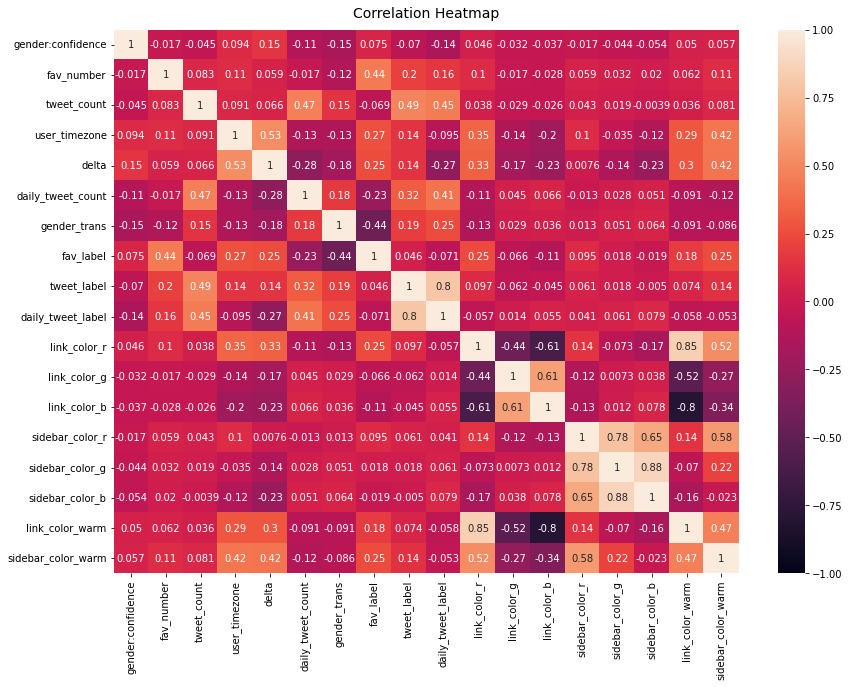

In [ ]:
# generate heatmap
plt.figure(figsize=(14, 10))
# Store heatmap object in a variable to easily access it
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## 3.4 Text Processing

The columns of "text", "description" and "name" have text values. So text processing is done for these three columns in preparation for building the models. Specifically, we removed punctuations, special characters, short words and stop-words. We also converted uppercase to lowercase and did lemmatization. TF_IDF and sentiment analysis are used to do text mining.

### 3.4.1 Remove punctuation

In [ ]:
df['text'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))
df['description'] = df['description'].map(lambda x: re.sub('[,\.!?]', '', x))
df['name'] = df['name'].map(lambda x: re.sub('[,\.!?]', '', x))

### 3.4.2 Convert uppercase to lowercase

In [ ]:
df['text'] = df['text'].map(lambda x: x.lower())
df['description'] = df['description'].map(lambda x: x.lower())
df['name'] = df['name'].map(lambda x: x.lower())

### 3.4.3 Remove special characters

In [ ]:
# remove twitter handles (@user) of the text column
df['text'] = df['text'].map(lambda x: re.sub('@[\w]*', '', x))
df['description'] = df['description'].map(lambda x: re.sub('@[\w]*', '', x))
df['name'] = df['name'].map(lambda x: re.sub('@[\w]*', '', x))

In [ ]:
# Remove the https link
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['description'] = df['description'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['name'] = df['name'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# Remove the http link
df['text'] = df['text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
df['description'] = df['description'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
df['name'] = df['name'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

In [ ]:
# Remove the special characters
df['text'] = df['text'].map(lambda x: re.sub('[\W]+', ' ', x))
df['description'] = df['description'].map(lambda x: re.sub('[\W]+', ' ', x))
df['name'] = df['name'].map(lambda x: re.sub('[\W]+', ' ', x))

df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df['description'] = df['description'].str.replace("[^a-zA-Z#]", " ")
df['name'] = df['name'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
print(df['description'])

0                                     i sing my own rhythm
1        i m the author of novels filled with family dr...
2                      louis whining and squealing and all
3        mobile guy   ers shazam google kleiner perkins...
4           the secret of getting ahead is getting started
                               ...                        
13898    head chef chez bruce loves cars and bicycles  ...
13899                                    i love memyself i
13900                                                  rp 
13901     teambarcelona you look lost so you should fol...
13902                        teamwork makes the dream work
Name: description, Length: 13872, dtype: object


### 3.4.4 Remove short words

After exploring the dataset, we have found that some short words with no actual meanings appear frequently. Considering this will affect the text mining result, we decided to remove very short words.

In [ ]:
# remove the short words
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['descrption'] = df['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['name'] = df['name'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### 3.4.5 Remove stop-words

Stop words are commonly used words which are not important. We removed stop words to only focus on other important words when doing text mining.

In [ ]:
# Removing stop-words in text
# First we need to take a glance at the most common words in text

twit_vocab = Counter()
for twit in df['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1

# desc_vocab = Counter()
# for twit in data['description']:
#     for word in twit.split(' '):
#         desc_vocab[word] += 1

twit_vocab.most_common(6)

[('weather', 2302),
 ('from', 1663),
 ('that', 1297),
 ('with', 1200),
 ('updates', 1149),
 ('channel', 1146)]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

[('weather', 2302),
 ('updates', 1149),
 ('channel', 1146),
 ('like', 652),
 ('love', 462),
 ('time', 427),
 ('people', 379),
 ('know', 356),
 ('last', 345),
 ('best', 318),
 ('good', 304),
 ('back', 303),
 ('make', 286),
 ('want', 275),
 ('need', 274),
 ('makes', 238),
 ('still', 234),
 ('think', 227),
 ('today', 224),
 ('great', 223)]

In [ ]:
# Removing stop-words in description
# First we need to take a glance at the most common words in description

twit_vocab01 = Counter()
for twit in df['description']:
    for word in twit.split(' '):
        twit_vocab01[word] += 1

# desc_vocab = Counter()
# for twit in data['description']:
#     for word in twit.split(' '):
#         desc_vocab[word] += 1

twit_vocab01.most_common(6)

[('', 35981),
 ('and', 3606),
 ('the', 3468),
 ('i', 2556),
 ('of', 2413),
 ('a', 2388)]

In [ ]:
stop = stopwords.words('english')

twit_vocab_reduced01 = Counter()
for w, c in twit_vocab01.items():
    if not w in stop:
        twit_vocab_reduced01[w]=c

twit_vocab_reduced01.most_common(20)

[('', 35981),
 ('love', 673),
 ('life', 515),
 ('news', 457),
 ('music', 343),
 ('follow', 318),
 ('like', 311),
 ('fan', 307),
 ('world', 290),
 ('one', 280),
 ('writer', 243),
 ('twitter', 241),
 ('best', 236),
 ('lover', 233),
 ('time', 231),
 ('live', 225),
 ('new', 216),
 ('sports', 216),
 ('get', 211),
 ('us', 202)]

In [ ]:
# Removing stop-words in name
# First we need to take a glance at the most common words in name

twit_vocab02 = Counter()
for twit in df['name']:
    for word in twit.split(' '):
        twit_vocab02[word] += 1

# desc_vocab = Counter()
# for twit in data['description']:
#     for word in twit.split(' '):
#         desc_vocab[word] += 1

twit_vocab02.most_common(6)

[('', 260),
 ('jcsc', 86),
 ('slhb', 78),
 ('jcsb', 62),
 ('lktb', 56),
 ('trdb', 50)]

In [ ]:
stop = stopwords.words('english')

twit_vocab_reduced02 = Counter()
for w, c in twit_vocab02.items():
    if not w in stop:
        twit_vocab_reduced02[w]=c

twit_vocab_reduced02.most_common(20)

[('', 260),
 ('jcsc', 86),
 ('slhb', 78),
 ('jcsb', 62),
 ('lktb', 56),
 ('trdb', 50),
 ('gnlc', 50),
 ('lktc', 49),
 ('jcsa', 49),
 ('slhd', 48),
 ('trda', 47),
 ('lkta', 45),
 ('gnlb', 43),
 ('slha', 43),
 ('stwb', 40),
 ('stwa', 36),
 ('trdc', 33),
 ('stwd', 32),
 ('gnla', 29),
 ('dmfa', 29)]

### 3.4.6 Stemming

Stemming is used to keep only one form of words with similar meanings. It works by chopping off the ends of the words and usually removed derivational affixes (Stemming and lemmatization, 2009). It is a very important step for text processing and mining.

In [ ]:
porter = PorterStemmer()

def tokenizer_porter(document):
    return [porter.stem(word) for word in document.split()]

### 3.4.7 TF_IDF

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. By using TF-IDF, each word is given a score based on its frequency in a document and across documents. If a word has a high frequency in a document but a low frequency in a corpus, it will be assigned a high score, which means that this word is very important (Scott, 2019). However, if a word appears very frequently in a corpus, it will be given a low score showing that it is less important. TF_IDF is a better way to measure the importance of a word in a document compared with TF - Term Frequency because the latter only considers a word's importance according to its frequency.

We used TfidfVectorizer() in Scikitlearn to convert text features to TF_IDF features, which come in the form of sparse matrixes. In this process, the features are also normalized by using the default parameter norm equals ’l2’ ((sklearn.feature_extraction.text.TfidfVectorizer, n.d.). The aiming of using normalization is to ensure all the features are on a similar scale, which improves the model performance.

In [ ]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)

### 3.4.8 Sentiment Analysis

In this step, we used the python library TextBlot to analyze the sentiment of the text column. As we know, a brand Twitter account tends to post neutral or positive texts while a human account usually posts positive or negative texts. Therefore, we believe that analysing the sentiment and add it as a new freature to train the models will help us improve the model performance. By doing sentiment analysis, there are three values in the new created "Sentiment" column, which are 0, 1 and 2. This column is transformed into discrete values, so it will be easier for us to mine associate rules.

When TextBlot is used, the polarity value ranges from -1 to 1. If the value is close to 1, the text content is considered positive. On the contrary, if the values is close to -1, the text has negative meaning (Shah, 2020).

In [ ]:
# Passing each tweet string through Textblob
# Place the resulting polarity and subjectivity in respective columns
# Create a new ‘Sentiment’ column where we label the tweet as Negative, Neutral or Positive, depending on the polarity

for row in df.itertuples():
    tweet = df.at[row[0], 'text']
    # run sentiment using TextBlob
    analysis = TextBlob(tweet)
    # set value to dataframe
    df.at[row[0], 'polarity'] = analysis.sentiment[0]
    df.at[row[0], 'subjectivity'] = analysis.sentiment[1]

    # #Create Positive / negative column depending on polarity
    if analysis.sentiment[0] > 0:
        # "Positive"
        df.at[row[0], 'Sentiment'] = 1
    elif analysis.sentiment[0] < 0:
        # "Negative"
        df.at[row[0], 'Sentiment'] = 2
    else:
        # "Neutral"
        df.at[row[0], 'Sentiment'] = 0


### 3.4.9 Topic modeling

Topic model is a probabilistic model aiming to find the hidden topics in a corpus. There are several topic modeling algorithms, and Latent Dirichlet Allocation(LDA) is a commonly used algorithm, which is applied in this work. In LDA's topic modelling strategy, each document is viewed as a collection of topics, and each topic is viewed as a collection of keywords. LDA works by arranging the topics' distribution within documents and their key word distribution to create a cohesive topic-keyword distribution (CR, 2020). Topic modeling with LDA is applied to the "text" column.

In [ ]:
# Enable logging for gensim - optional
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 48.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=827de23c3fec04e149e4cf276cf2bcff995ef80ae4014c9c7c09a8e123e2abdb
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=74796182078156f31f953e49c1e173b71f216cae4c8cbddc77fed750c601211c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# Convert to list
data = df.text.values.tolist()

# Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['robbie', 'responds', 'critics', 'after', 'against', 'eddie', 'edwards']]


In [ ]:
# Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['robbie', 'responds', 'critics', 'after', 'against', 'eddie', 'edwards']


In [ ]:
# Make Bigrams and Lemmatize
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['respond', 'critic', 'edward']]


In [ ]:
# Create the Dictionary and Corpus needed for Topic Modeling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


LDA model is built in this step. We chose different numbers of topics to do experiments. Coherence score can be used to evaluate the model performance (CR, 2020). The optimal model should have the highest coherence score. After doing experiments, we decided to choose three topic numbers.

In [ ]:
# Ignore deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Building the Topic Model
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           minimum_probability = 0.001,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# View the topics in LDA model
# Print the Keyword in the 3 topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"good" + 0.023*"love" + 0.019*"people" + 0.018*"know" + 0.016*"look" '
  '+ 0.016*"makes_last" + 0.013*"still" + 0.012*"life" + 0.009*"thing" + '
  '0.009*"great"'),
 (1,
  '0.028*"just" + 0.014*"go" + 0.014*"make" + 0.013*"time" + 0.012*"want" + '
  '0.012*"think" + 0.010*"makes_last" + 0.010*"only" + 0.010*"more" + '
  '0.009*"come"'),
 (2,
  '0.012*"work" + 0.012*"take" + 0.012*"makes_last" + 0.009*"friend" + '
  '0.009*"home" + 0.009*"year" + 0.008*"show" + 0.008*"much" + 0.008*"give" + '
  '0.007*"game"')]


Topics-keywords distributions are visualized in this step. We can find that the three topics are separated in different quadrants. Topic 1 is the most dominant becuase it has the largest area. We also examine the salient words within each topic to udnerstand their differences. For example, some subjective words appear in Topic 1, like "want", "shit" and so on. Topic 2 talks about "love", "good" and "life" while Topic 3 mentions "work", "friend" and "home".

In [ ]:
# Visualize the topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.247655  0.014981       1        1  41.521755
0      0.108929 -0.194260       2        1  29.611487
2      0.138726  0.179279       3        1  28.866758, topic_info=             Term        Freq       Total Category  logprob  loglift
21           just  895.000000  895.000000  Default  30.0000  30.0000
9            good  570.000000  570.000000  Default  29.0000  29.0000
78           love  520.000000  520.000000  Default  28.0000  28.0000
666        people  426.000000  426.000000  Default  27.0000  27.0000
156          know  409.000000  409.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
217          part   82.534587   83.261396   Topic3  -5.6004   1.2337
707          turn   85.380900   86.146586   Topic3  -5.5665   1.2336
216           kid   84.126588   84.888612   Topic3  -5.5813   1.2335
539     halloween   78.914041   79.630252   Topic3  -5.6453   1.2334
11625  makes_last  275.523647  976.520749   Topic3  -4.3950  -0.0228

[126 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
637       1  0.996271   again
644       2  0.991555    also
197       3  0.994503  always
120       1  0.998668    back
387       3  0.992519    book
...     ...       ...     ...
233       1  0.998432    well
357       3  0.990110   woman
259       3  0.997317    work
200       3  0.994481   world
26        3  0.996774    year

[97 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In the following step, we converted topics to feature vectors and store them in a new column of the dataframe called "topic". Then each of the Topics 1, 2 and 3 are stored in a separated column so that they can be taken to train the following clustering and classification models.

In [ ]:
# Converting Topics to Feature Vectors
train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0)
    )
    topic_vec = [top_topics[i][1] for i in range(3)]
    train_vecs.append(topic_vec)

In [ ]:
df["topic"] = np.array(train_vecs).tolist()
df["topic"]

0        [0.28022176027297974, 0.37954434752464294, 0.3...
1        [0.22712643444538116, 0.3253481090068817, 0.44...
2        [0.3811907172203064, 0.3725600242614746, 0.246...
3        [0.31339603662490845, 0.39065778255462646, 0.2...
4        [0.29216426610946655, 0.41855964064598083, 0.2...
                               ...                        
13898    [0.34845924377441406, 0.3799939453601837, 0.27...
13899    [0.25462326407432556, 0.4429806172847748, 0.30...
13900    [0.2996893525123596, 0.4620884358882904, 0.238...
13901    [0.30458566546440125, 0.49309709668159485, 0.2...
13902    [0.17262397706508636, 0.3744525611400604, 0.45...
Name: topic, Length: 13872, dtype: object

In [ ]:
df['topic_1'] = df['topic'].apply(lambda x:x[0])
df['topic_2'] = df['topic'].apply(lambda x:x[1])
df['topic_3'] = df['topic'].apply(lambda x:x[2])
df.head()

gender  gender:confidence             created  \
0   male             1.0000 2013-12-05 01:48:00   
1   male             1.0000 2012-10-01 13:51:00   
2   male             0.6625 2014-11-28 11:30:00   
3   male             1.0000 2009-06-11 22:39:00   
4   male             1.0000 2012-12-03 21:54:00   

                                         description  fav_number link_color  \
0                               i sing my own rhythm           0     08C2C2   
1  i m the author of novels filled with family dr...          68     0084B4   
2                louis whining and squealing and all        7696     ABB8C2   
3  mobile guy   ers shazam google kleiner perkins...         202     0084B4   
4     the secret of getting ahead is getting started          80     0000FF   

             name sidebar_color  \
0          sheezy        FFFFFF   
1     davdburnett        C0DEED   
2  lwtprettylaugh        C0DEED   
3     douggarland        C0DEED   
4      robinmeske        C0DEED   

                                                text  tweet_count  ...  \
0  robbie responds critics after against eddie ed...       110964  ...   
1  felt like they were friends living story with ...         7471  ...   
2  absolutely adore when louis starts songs hits ...         5617  ...   
3                    looking typically advanced user         1693  ...   
4  gala bingo clubs bought largest high street bi...       112117  ...   

   link_color_warm  sidebar_color_warm  \
0                0                   1   
1                0                   0   
2                0                   0   
3                0                   0   
4                0                   0   

                                          descrption  polarity  subjectivity  \
0                                        sing rhythm  0.000000      0.000000   
1     author novels filled with family drama romance  0.000000      0.000000   
2                            louis whining squealing  0.202778      0.680556   
3  mobile shazam google kleiner perkins yahoo spr...  0.400000      0.600000   
4               secret getting ahead getting started  0.160000      0.540000   

   Sentiment                                              topic   topic_1  \
0        0.0  [0.28022176027297974, 0.37954434752464294, 0.3...  0.280222   
1        0.0  [0.22712643444538116, 0.3253481090068817, 0.44...  0.227126   
2        1.0  [0.3811907172203064, 0.3725600242614746, 0.246...  0.381191   
3        1.0  [0.31339603662490845, 0.39065778255462646, 0.2...  0.313396   
4        1.0  [0.29216426610946655, 0.41855964064598083, 0.2...  0.292164   

    topic_2   topic_3  
0  0.379544  0.340234  
1  0.325348  0.447526  
2  0.372560  0.246249  
3  0.390658  0.295946  
4  0.418560  0.289276  

[5 rows x 35 columns]

### 3.4.10 Clean data

After doing data pre-processing, we have a clean dataset that can be used for clustering, association rules and classification. Considering different features come in different types of values, we used ColumnTransformer() to transform each feature independently so that all the features are in appropriate forms accepted by clustering and classification models. To be specific, I used TfidfVectorizer to transform the text features including "text", "description" and "name" while I normalized the "fav_number", "daily_tweet_count", "Sentiment", "link_color_warm'" and "sidebar_color_warm" columns. We don't need to transform the remaining features including "topic_1", "topic_2" and "topic_3" because they are in the range of 0 and 1. To sum up, the following features are used to do clustering, classification and association rule mining:

*   "text"
*   "description"
*   "name"
*   "fav_number"
*   "daily_tweet_count"
*   "Sentiment"
*   "link_color_warm"
*   "sidebar_color_warm"
*   "topic_1"
*   "topic_2"
*   "topic_3"

When getting the clean data, we first focus on the dataset in which the "gender:confidence" equals 1 and will do clustering on this dataet.

In [ ]:
# sets of columns to be transformed different ways
text_col = 'text'
description_col = 'description'
gender_col = 'gender_trans'
confidence_col = 'gender:confidence'
name_col = 'name'
topic_1_col = 'topic_1'
topic_2_col = 'topic_2'
topic_3_col = 'topic_3'

# num_col = ['fav_number', 'daily_tweet_count', 'Sentiment', 'link_color_warm' , 'sidebar_color_warm', 'topic_1', 'topic_2']
num_col = ['fav_number', 'daily_tweet_count']
cat_col = ['Sentiment', 'link_color_warm' , 'sidebar_color_warm']
#cat_col01 = ['fav_label', 'daily_tweet_label']

df_1 = df[df['gender:confidence']==1]
df_clean = df_1[[text_col, description_col, name_col, topic_1_col, topic_2_col, topic_3_col] + num_col + cat_col]
# create ColumnTransformer, and pass the column names to transform in each step
cols_trans = ColumnTransformer([
      ('txt', tfidf, text_col),
      ('des', tfidf, description_col),
      ('name', tfidf, name_col),
      ('num_col', StandardScaler(), num_col),
      ('cat_col', OneHotEncoder(), cat_col)],
    remainder = 'passthrough'
)

df_trans = cols_trans.fit_transform(df_clean)


# 4 Clustering

Clustering methods are descriptive methods that help digging out the nature of the dataset by clustering data into various groups. In this case, by summarising the information from both digital data texts data, would be useful in terms of understanding the main characteristics of the distinct categories.

“Traditional k-means clustering algorithms, and their extensions, have been widely exploited for bibliometric data and have received relatively positive feedback”. (G. Colavizza, M. Franceschet , 2016)



K-Means clustering as an unsupervised method, works on the dataset without label. Based on similarity, group or separate dataset. As a many related research shows, it is widely used in text analysis. Therefore, in this case, we combine the digital features and text features to explore the characteristic of different user profile.

## 4.1 kmeans

After the text information has been gone through TfidfVectorizer, continuous value has been standardized, categorical value has been gone through one hot encoding, we fit the data in Kmeans for training purpose.

In [ ]:
model = KMeans(n_clusters=2, max_iter = 600, random_state=42)
model.fit(df_trans)

df_1.loc[:,"cluster"] = model.labels_
df_1["cluster"].value_counts()

0    9995
1     159
Name: cluster, dtype: int64

In [ ]:
df_1['gender_trans'].value_counts()

0    7322
1    2832
Name: gender_trans, dtype: int64

##4.2 Visualization of digital features

After implementing Kmeans to cluster groups, we need to analyse the characteristic of each cluster, as the dataset we used include digital value and text value, so we will analyse those parts separately by some visualization methods.

In the following steps, we will make a subset which only hold digital value. Then we calculate the mean value of each value and see the distance of each cluster in each feature. On top of that, we scatter the clusters in each feature, see how they separate from each other.


In [ ]:
#get a dataset that only contains digital number, as data_trans does not work in visulization
data_digital=df_1[['gender_trans','fav_number','daily_tweet_count','link_color_warm','sidebar_color_warm','Sentiment','fav_label','daily_tweet_label','cluster']]

In [ ]:
#get mean value
data_mean = data_digital.groupby(['cluster']).agg('mean')
print(data_mean)

         gender_trans   fav_number  daily_tweet_count  link_color_warm  \
cluster                                                                  
0            0.274337  3836.562381           37.39950         0.198599   
1            0.566038  3020.327044         1247.18239         0.031447   

         sidebar_color_warm  Sentiment  fav_label  daily_tweet_label  
cluster                                                               
0                  0.332866   0.694247   1.495348           1.368284  
1                  0.050314   0.314465   0.452830           3.000000  


After calculating the distance between each cluster in each feature, we can tell daily_tweet_count has furthest distance, next are link_color_warm, sidebar_color_warm.

In [ ]:
# see how each features distance from each other and how it scater
columns = list(data_mean)
for column in columns:
  dist = np.abs(data_mean[column][0] - data_mean[column][1])/max(data_mean[column])

  print('{}: {}'.format(column, dist))

gender_trans: 0.5153376688344172
fav_number: 0.21275174389635151
daily_tweet_count: 0.9700128064254011
link_color_warm: 0.8416583495714716
sidebar_color_warm: 0.8488448807451139
Sentiment: 0.5470411066427022
fav_label: 0.6971739772615378
daily_tweet_label: 0.5439052859763215


After calculating the distance between each cluster in each feature, we can tell daily_tweet_count has furthest distance, next are link_color_warm, sidebar_color_warm.

We also plot box pot to see how two cluster distribute in one feature. plots show that in daily_tweet_count, cluster 0 concentrate within 0-600, cluster 1 concentrate between 600-2400. The huge difference also can reflect from daily_tweet_label, cluster 1 is concentrate in label 3.




In fav_number, cluster 0 has more user over 100000 favourite number than cluster 1. From fav_label also can tell cluster 1 are lower value compared to cluster 0.  

In sidebar_warm, cluser 0 distributes between 0-1, but cluster 1 concentrate in 1.  




For sentiment, cluster 0 more concentrate between 0-1, and 25% concentrate between 1-2, however, cluster 1 are focus in 0.




There is no obvious difference in gender_trans and link_color_warm.

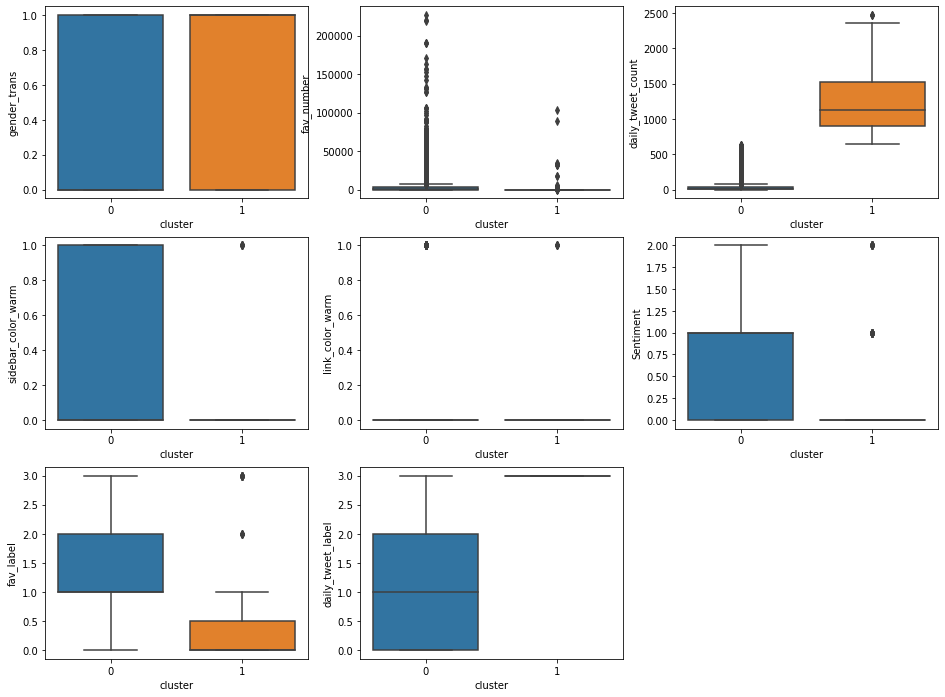

In [ ]:
#the characteristic of each cluster
plt.figure(figsize=[16,12])
plt.subplot(331)
sns.boxplot(x="cluster", y="gender_trans", data=data_digital)

plt.subplot(332)
sns.boxplot(x="cluster", y="fav_number", data=data_digital)

plt.subplot(333)
sns.boxplot(x="cluster", y="daily_tweet_count", data=data_digital)

plt.subplot(334)
sns.boxplot(x="cluster", y="sidebar_color_warm", data=data_digital)

plt.subplot(335)
sns.boxplot(x="cluster", y="link_color_warm", data=data_digital)

plt.subplot(336)
sns.boxplot(x="cluster", y="Sentiment", data=data_digital)

plt.subplot(337)
sns.boxplot(x="cluster", y="fav_label", data=data_digital)

plt.subplot(338)
sns.boxplot(x="cluster", y="daily_tweet_label", data=data_digital)


plt.show()

For visualization more easily, we scaled the data before visualization.

In [ ]:
#generate a scaled dataset for visualization
data_scaled=data_digital.copy()
data_scaled= data_scaled.drop('cluster', 1)
data_scaled[data_scaled.columns] = StandardScaler().fit_transform(data_scaled)
print(data_scaled.describe())

       gender_trans    fav_number  daily_tweet_count  link_color_warm  \
count  1.015400e+04  1.015400e+04       1.015400e+04     1.015400e+04   
mean  -3.918691e-17 -1.399533e-17      -8.397196e-18     5.020823e-17   
std    1.000049e+00  1.000049e+00       1.000049e+00     1.000049e+00   
min   -6.219160e-01 -3.423601e-01      -3.167186e-01    -4.937135e-01   
25%   -6.219160e-01 -3.410171e-01      -3.054762e-01    -4.937135e-01   
50%   -6.219160e-01 -3.028754e-01      -2.661276e-01    -4.937135e-01   
75%    1.607934e+00 -7.803205e-02      -1.087332e-01    -4.937135e-01   
max    1.607934e+00  1.994167e+01       1.355085e+01     2.025466e+00   

       sidebar_color_warm     Sentiment     fav_label  daily_tweet_label  
count        1.015400e+04  1.015400e+04  1.015400e+04       1.015400e+04  
mean        -3.778738e-17  5.878037e-17 -2.519159e-17       3.078972e-17  
std          1.000049e+00  1.000049e+00  1.000049e+00       1.000049e+00  
min         -6.993387e-01 -9.339950e-01 -1

And we plot two clusters based on the mean distribution. From the plot we can tell, the features have distinct difference are daily_tweet_count, daily_tweet_label and fav_lable, next is sidebar_color_warm.

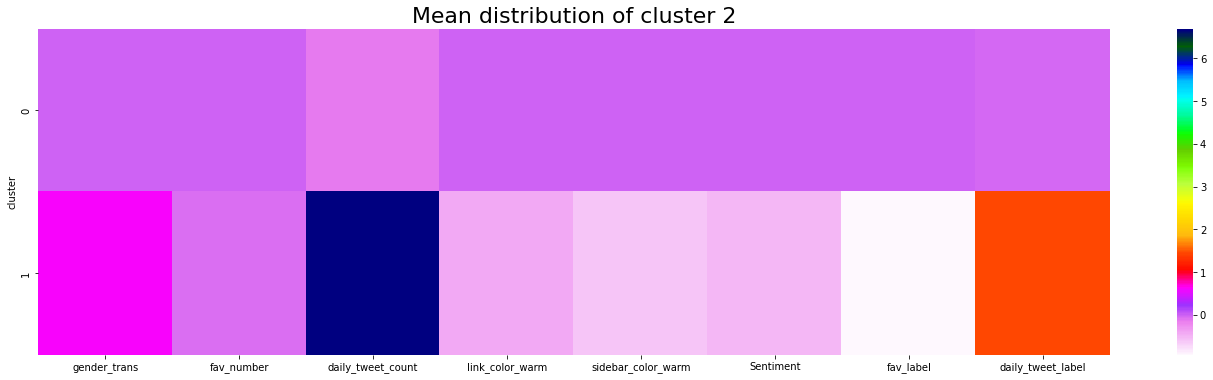

In [ ]:
# store the data for comparison

data_scaled["cluster"] = model.labels_


# plot the mean distribution for each model
# using the normalized dataset
plt.figure(figsize=(24,6))


plt.title("Mean distribution of cluster 2",fontsize=22)
sns.heatmap(data_scaled.loc[:,['gender_trans','fav_number','daily_tweet_count','link_color_warm','sidebar_color_warm','Sentiment','fav_label','daily_tweet_label','cluster']].groupby(['cluster']).mean(), cmap="gist_ncar_r")



In conclusion, the difference between two cluster can be summarized in following table.

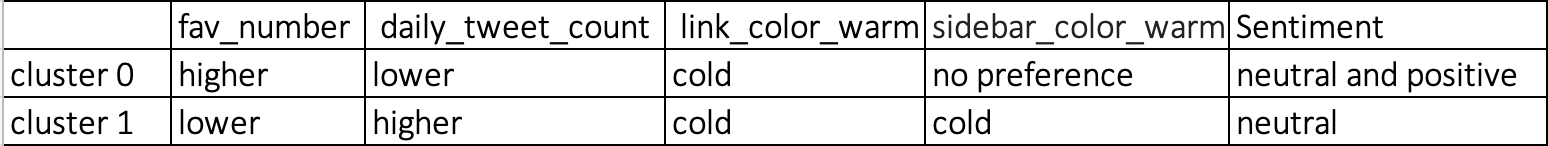

##4.3 Visualization of text features

### 4.3.1 WordCloud

In this part we start to analyse the characteristic of two cluster base on the texting feature.

In the text column, the key words are weather, channel, updates, love, will, time, want, good, think, people.

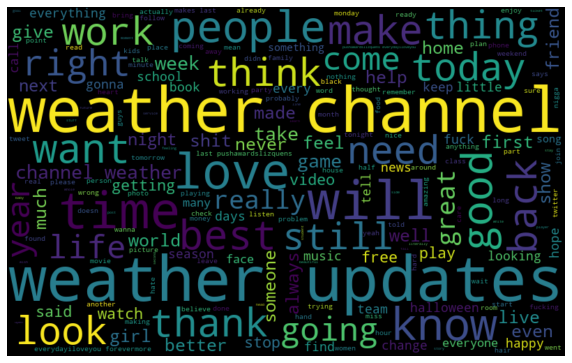

In [ ]:
# Evaluate the word count in the text column
all_words_text = ' '.join([text for text in df_1['text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the text column, the key words for cluster 0 are weather, channel, updates,
today, love, good, thank, people, work.

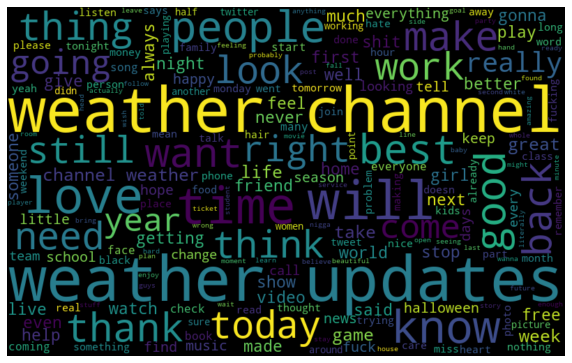

In [ ]:
words_0 = ' '.join([text for text in df_1['text'][df_1['cluster']== 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the text column, the key words for cluster 1 are makes, last, pushawardslizquens, everydayiloveyou, forevermore.

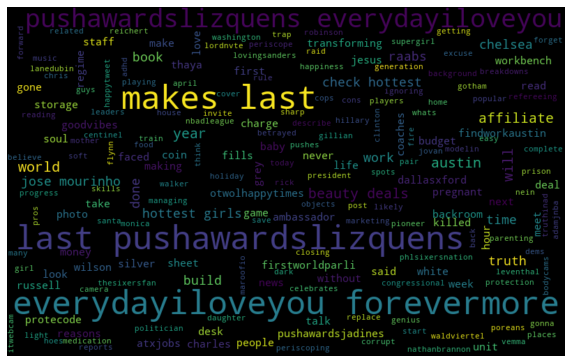

In [ ]:
words_1 = ' '.join([text for text in df_1['text'][df_1['cluster']== 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the description column, the key words are love, world, sport, life, new, follow, music, live, tweet, writer.

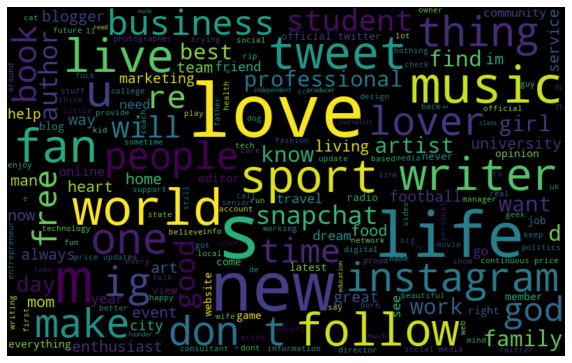

In [ ]:
# Evaluate the word count in the des column
all_words_description = ' '.join([description for description in df_1['description']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_description)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the description column, the key words for cluster 0 are love, new, world, life, sport, live, music, writer, tweet, follow.

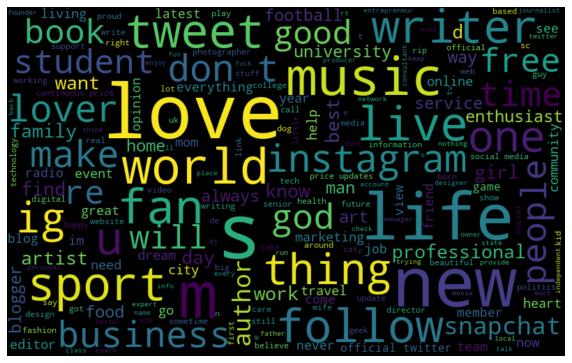

In [ ]:
words_0 = ' '.join([description for description in df_1['description'][df_1['cluster']== 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the description column, the key words for cluster 1 are news, check, follow, deal, pet, affiliate marketing, world, football, faridadad.

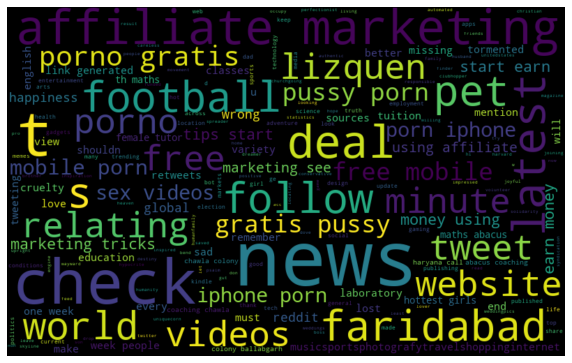

In [ ]:
words_1 = ' '.join([description for description in df_1['description'][df_1['cluster']== 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In name column, the key words are jcsb, lktb, lktc,jcsc, slhb, trdb, slha.

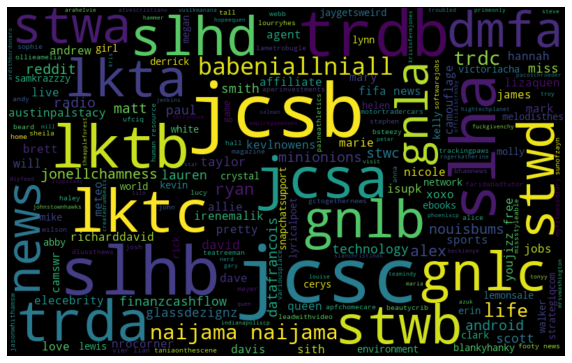

In [ ]:
# Evaluate the word count in the name column
all_words_name = ' '.join([name for name in df_1['name']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_name)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In name column, the key words for cluster 0 are jcsb, jcsa, jcsc, lktc, lktb, trdb, slhb.

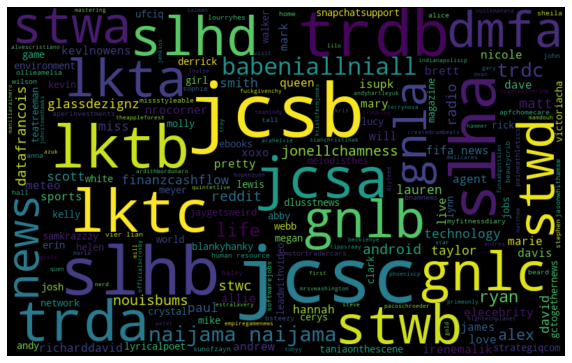

In [ ]:
words_0 = ' '.join([name for name in df_1['name'][df_1['cluster']== 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In name column, the key words for cluster 1 are news, minionions, affiliate, camouflage, free, austinpalstacy.

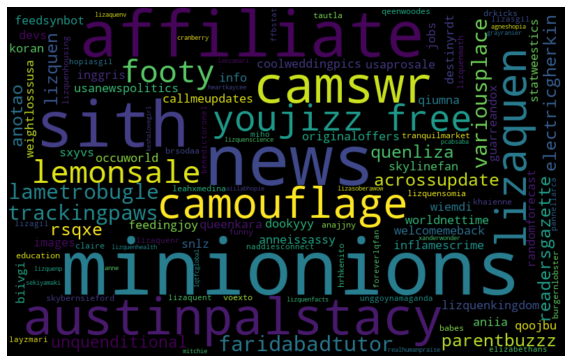

In [ ]:
words_1 = ' '.join([name for name in df_1['name'][df_1['cluster']== 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In text column, cluster 0 appears more words related people’s normal life, such as weather, love, time, will, thank, make, need, people, today, but in cluster one key words much simpler, the key word--makeawardslizquens, doesn't seem like having actual meaning.

In description column, cluster 0 has more words related to life and hobby, more like introduce oneself, from key words such as love, world, sport, fan, good, things. Cluster 1 more like narrated from a third-person perspective, from key words such as news, follow, check, webside, deal.

In name column, cluster 0 has more words have no actual meaning but more like a random-picked name, such as jcsa, lktc, jcsc. Cluster 1 has more words with actual meaning like news, free, minionions, lemonsale, those words do not look like human's name but more like some official account's name.

After analysing the features of each cluster, we can find that Cluster 0 is more likely to be human while Cluter 1 is more likely to be non-human according to the hypotheses we described before. We select the overlapped dataset in which the gender of df_1 matches the cluster result. The gender information in this selected dataset is more reliable. We will use this dataset to train the classification model and build association rules.


In [ ]:
# Select the overlapped dataset in which the gender of df_1 matches the cluster result
# The gender information in this selected dataset is more reliable

df_trust = df_1[(df_1["gender_trans"] == df_1["cluster"])]
len(df_trust)

7343

### 4.3.2 Topic modeling

We also use topic modeling to visualize the topic distributions of the text and descirption columns on the df_trust dataset. The topics-keywords distributions are explored in each cluster. First, we examined the topics-keywords distributions in Cluster 0.

In [ ]:

# Examine the topic distribution of the text and descirption columns in Clustering 0
df_trust_0 = df_trust[(df_trust["cluster"] == 0)]

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_text = df_trust_0.text.values.tolist()
data_words_text = list(sent_to_words(data_text))
print("In the text column of Cluster 0: ")
print(data_words_text[:1][0][:30])
print()
print("In the description column of Cluster 0: ")
data_description = df_trust_0.description.values.tolist()
data_words_description = list(sent_to_words(data_description))
print(data_words_description[:1][0][:30])

In the text column of Cluster 0: 
['robbie', 'responds', 'critics', 'after', 'against', 'eddie', 'edwards']

In the description column of Cluster 0: 
['sing', 'my', 'own', 'rhythm']


In [ ]:

# Create Dictionary
id2word_text = corpora.Dictionary(data_words_text)
# Create Corpus
texts = data_words_text
# Term Document Frequency
corpus_text = [id2word_text.doc2bow(text) for text in texts]
# View
print("In the text column of Cluster 0: ")
print(corpus_text[:1][0][:30])

print()

# Create Dictionary
id2word_description = corpora.Dictionary(data_words_description)
# Create Corpus
descriptions = data_words_description
# Term Document Frequency
corpus_description = [id2word_description.doc2bow(description) for description in descriptions]
# View
print("In the description column of Cluster 0: ")
print(corpus_description[:1][0][:30])

In the text column of Cluster 0: 
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In the description column of Cluster 0: 
[(0, 1), (1, 1), (2, 1), (3, 1)]


We also used the LDA model to do topic modeling in this step. After doing experiments, we decided to choose three topic numbers when training the model.

In [ ]:
# Ignore deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# number of topics
# Build LDA model
lda_model_text = gensim.models.ldamodel.LdaModel(corpus=corpus_text,
                                           id2word=id2word_text,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           minimum_probability = 0.001,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
print("In the text column of Cluster 0: ")
pprint(lda_model_text.print_topics())
doc_lda = lda_model_text[corpus_text]

print()

# Build LDA model
lda_model_description = gensim.models.ldamodel.LdaModel(corpus=corpus_description,
                                           id2word=id2word_description,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           minimum_probability = 0.001,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 3 topics
print("In the description column of Cluster 0: ")
pprint(lda_model_description.print_topics())
doc_lda = lda_model_description[corpus_description]

In the text column of Cluster 0: 
[(0,
  '0.029*"that" + 0.024*"just" + 0.022*"this" + 0.018*"like" + 0.016*"when" + '
  '0.014*"they" + 0.012*"what" + 0.011*"about" + 0.011*"love" + 0.009*"time"'),
 (1,
  '0.028*"with" + 0.026*"your" + 0.014*"people" + 0.011*"from" + 0.011*"good" '
  '+ 0.010*"only" + 0.009*"still" + 0.008*"their" + 0.007*"best" + '
  '0.006*"right"'),
 (2,
  '0.032*"have" + 0.012*"know" + 0.011*"back" + 0.010*"been" + 0.009*"some" + '
  '0.009*"here" + 0.008*"need" + 0.007*"shit" + 0.007*"home" + 0.007*"over"')]

In the description column of Cluster 0: 
[(0,
  '0.011*"ig" + 0.009*"enthusiast" + 0.007*"snapchat" + 0.007*"sc" + '
  '0.006*"rip" + 0.006*"marketing" + 0.006*"im" + 0.005*"artist" + 0.004*"new" '
  '+ 0.004*"blogger"'),
 (1,
  '0.049*"of" + 0.042*"and" + 0.012*"at" + 0.010*"for" + 0.008*"fan" + '
  '0.008*"lover" + 0.007*"writer" + 0.006*"about" + 0.005*"sports" + '
  '0.005*"business"'),
 (2,
  '0.037*"the" + 0.026*"to" + 0.022*"my" + 0.020*"you" + 0.019*

Following is the topics-keywords distribution in the text column of Cluster 0. We can find that the three topics are separated in different quadrants. Topic 1 is the most dominant becuase it has the largest area. We also examine the salient words within each topic to udnerstand their differences. For example, Topic 1 talks about "love", "time", "life" and so on. Topic 2 talks about positive personal feelings, like "good", "best" and "right" while Topic 3 is related to negative meanings considering the words "shit".

In [ ]:
# Visualize the topics-keywords in the text column of Cluster 0
pyLDAvis.enable_notebook()
vis_text = pyLDAvis.gensim_models.prepare(lda_model_text, corpus_text, id2word_text)
vis_text

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.211540 -0.052933       1        1  41.014568
1      0.158752 -0.132045       2        1  32.449343
2      0.052789  0.184978       3        1  26.536089, topic_info=           Term        Freq       Total Category  logprob  loglift
191        have  485.000000  485.000000  Default  30.0000  30.0000
145        that  680.000000  680.000000  Default  29.0000  29.0000
15         with  531.000000  531.000000  Default  28.0000  28.0000
443        your  494.000000  494.000000  Default  27.0000  27.0000
34         just  569.000000  569.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
719   something   62.531876   63.266343   Topic3  -5.5000   1.3150
225     nothing   65.045286   65.820090   Topic3  -5.4606   1.3148
268        give   56.893028   57.577284   Topic3  -5.5945   1.3147
1408       hate   63.311217   64.072673   Topic3  -5.4876   1.3147
276     without   57.187242   58.008013   Topic3  -5.5893   1.3124

[125 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
174       1  0.997862    about
511       2  0.995731    again
410       3  0.996401   always
117       3  0.994135     back
252       2  0.992011  because
...     ...       ...      ...
276       3  0.982623  without
264       1  0.997006     work
168       1  0.994430    world
304       1  0.991325    would
443       2  0.998520     your

[100 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In addition, we visualized topics-keywords distribution in the description column of Cluster 0. We can find that the three topics are located in different quadrants. Topic 1 is the most dominant because it has the largest area. We also examine the salient words within each topic to understand their differences. After exploring the topics, we can conclude that the dominant topic in Cluster 0 is more related to personal feelings or experiences. The words "my", "you" and "me" are the most salient ones in Topic 1. As we know, these words are more likely to be used by a human profile instead of a brand profile. Cluster 0 is more likely to be the human profile, which is in line with the analysis in the previous parts.

In [ ]:
# Visualize the topics-keywords in the description column of Cluster 0
pyLDAvis.enable_notebook()
vis_description = pyLDAvis.gensim_models.prepare(lda_model_description, corpus_description, id2word_description)
vis_description

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.239374 -0.015528       1        1  51.095136
1      0.136501 -0.158034       2        1  33.229110
0      0.102873  0.173562       3        1  15.675753, topic_info=          Term         Freq        Total Category  logprob  loglift
10          of  1101.000000  1101.000000  Default  30.0000  30.0000
12         the  1272.000000  1272.000000  Default  29.0000  29.0000
55          to   893.000000   893.000000  Default  28.0000  28.0000
4          and  1567.000000  1567.000000  Default  27.0000  27.0000
0           my   764.000000   764.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
574      young    26.798528    27.702918   Topic3  -5.9744   1.8199
678   internet    27.229429    28.230344   Topic3  -5.9585   1.8170
967     school    27.204841    28.208485   Topic3  -5.9594   1.8168
2116      john    27.139180    28.492930   Topic3  -5.9618   1.8044
205     follow    34.367005   105.062671   Topic3  -5.7257   0.7356

[138 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
492       2  0.998470    about
3152      3  0.993433   addict
132       1  0.610443      all
132       2  0.390220      all
443       1  0.998938       am
...     ...       ...      ...
80        1  0.999023      you
574       1  0.036097    young
574       3  0.974627    young
131       1  0.997173     your
1117      3  0.967483  youtube

[127 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

Similarly, the topics-keywords distribution in the text and description columns of Cluster 1 are also explored.

In [ ]:
# Examine the topic distribution of the text and descirption columns in Clustering 1
df_trust_1 = df_trust[(df_trust["cluster"] == 1)]

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_text = df_trust_1.text.values.tolist()
data_words_text = list(sent_to_words(data_text))
print("In the text column of Cluster 1: ")
print(data_words_text[:1][0][:30])

print()

data_description = df_trust_1.description.values.tolist()
data_words_description = list(sent_to_words(data_description))
print("In the description column of Cluster 1: ")
print(data_words_description[:1][0][:30])

In the text column of Cluster 1: 
['firstworldparli', 'poreans', 'should', 'look', 'forward', 'more', 'train', 'breakdowns', 'under', 'regime']

In the description column of Cluster 1: 
['tweets', 'relating', 'to', 'the', 'ge', 'general', 'election']


In [ ]:
# Create Dictionary
id2word_text = corpora.Dictionary(data_words_text)
# Create Corpus
texts = data_words_text
# Term Document Frequency
corpus_text = [id2word_text.doc2bow(text) for text in texts]
# View
print("In the text column of Cluster 1: ")
print(corpus_text[:1][0][:30])

print()
# Create Dictionary
id2word_description = corpora.Dictionary(data_words_description)
# Create Corpus
descriptions = data_words_description
# Term Document Frequency
corpus_description = [id2word_description.doc2bow(description) for description in descriptions]
# View
print("In the description column of Cluster 1: ")
print(corpus_description[:1][0][:30])

In the text column of Cluster 1: 
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]

In the description column of Cluster 1: 
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


The LDA model is built in this step.

In [ ]:
# Ignore deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Build LDA model
lda_model_text = gensim.models.ldamodel.LdaModel(corpus=corpus_text,
                                           id2word=id2word_text,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           minimum_probability = 0.001,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
print("In the text column of Cluster 1: ")
pprint(lda_model_text.print_topics())
doc_lda = lda_model_text[corpus_text]

print()

# Build LDA model
lda_model_description = gensim.models.ldamodel.LdaModel(corpus=corpus_description,
                                           id2word=id2word_description,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           minimum_probability = 0.001,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
print("In the description column of Cluster 1: ")
pprint(lda_model_description.print_topics())
doc_lda = lda_model_description[corpus_description]


In the text column of Cluster 1: 
[(0,
  '0.011*"with" + 0.011*"down" + 0.011*"mourinho" + 0.011*"jose" + '
  '0.011*"chelsea" + 0.011*"what" + 0.008*"have" + 0.008*"fills" + '
  '0.008*"soul" + 0.008*"read"'),
 (1,
  '0.017*"deals" + 0.017*"beauty" + 0.009*"money" + 0.009*"that" + '
  '0.005*"with" + 0.005*"wicked" + 0.005*"reprises" + 0.005*"most" + '
  '0.005*"time" + 0.005*"uproariously"'),
 (2,
  '0.046*"what" + 0.046*"last" + 0.044*"forevermore" + 0.044*"makes" + '
  '0.010*"with" + 0.005*"charles" + 0.005*"which" + 0.005*"without" + '
  '0.005*"regime" + 0.005*"firstworldparli"')]

In the description column of Cluster 1: 
[(0,
  '0.030*"affiliate" + 0.030*"marketing" + 0.026*"for" + 0.023*"news" + '
  '0.023*"faridabad" + 0.022*"football" + 0.019*"more" + 0.019*"and" + '
  '0.019*"deals" + 0.015*"get"'),
 (1,
  '0.028*"we" + 0.028*"this" + 0.025*"to" + 0.025*"and" + 0.025*"in" + '
  '0.016*"the" + 0.016*"out" + 0.016*"check" + 0.016*"be" + 0.013*"of"'),
 (2,
  '0.035*"porn" + 0.

We can find that the three topics are separated in different quadrants in the text column of Cluster 1. The three topics have the similar weight becuase they have the similar areas. We also examine the salient words within each topic to udnerstand their differences. After exploring the topics, we can find that "staff", "budget" and "deals" are very important words that have been mentioned. It is concluded that Cluser 1 is more likely to be the non-human profile, which is in line with the analysis in previous parts.

In [ ]:
# Visualize the topics-keywords in the text column of Cluster 1
pyLDAvis.enable_notebook()
vis_text = pyLDAvis.gensim_models.prepare(lda_model_text, corpus_text, id2word_text)
vis_text


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.121267 -0.004049       1        1  51.643350
0      0.065221 -0.078246       2        1  27.609309
1      0.056046  0.082294       3        1  20.747341, topic_info=            Term       Freq      Total Category  logprob  loglift
34          last  14.000000  14.000000  Default  30.0000  30.0000
396  forevermore  13.000000  13.000000  Default  29.0000  29.0000
397        makes  13.000000  13.000000  Default  28.0000  28.0000
31          what  15.000000  15.000000  Default  27.0000  27.0000
333       beauty   2.000000   2.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
256         bond   0.616344   1.020137   Topic3  -5.2708   1.0689
361        water   0.616341   1.020138   Topic3  -5.2708   1.0689
214   synonymous   0.616341   1.020140   Topic3  -5.2708   1.0689
78          that   1.076645   2.016077   Topic3  -4.7130   0.9454
61          with   0.616595   5.331510   Topic3  -5.2704  -0.5844

[151 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
264       2  0.916845      abacu
205       3  0.980265     actors
101       1  0.361739  affiliate
101       2  0.361739  affiliate
101       3  0.361739  affiliate
...     ...       ...        ...
122       1  0.434448      world
122       2  0.434448      world
246       1  0.809090      write
304       1  1.045220       year
143       2  0.615921      years

[141 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

We can find that the three topics are separated in different quadrants in the description column of Cluster 1. Topic 1 is the most dominant one becuase it has the largest area. We also examine the salient words within each topic to udnerstand their differences. After exploring the topics, we can find that "marketing", "sports", "business", "photographer" and "consultant" are salient words that have been mentioned. It is concluded that these three topics in Cluster 1 are more related to the business field. Cluser 1 is more likely to be the non-human profile, which is in line with the analysis in previous parts.

In [ ]:
# Visualize the topics-keywords in the description column of Cluster 1
pyLDAvis.enable_notebook()
vis_text = pyLDAvis.gensim_models.prepare(lda_model_description, corpus_description, id2word_description)
vis_description

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.239374 -0.015528       1        1  51.095136
1      0.136501 -0.158034       2        1  33.229110
0      0.102873  0.173562       3        1  15.675753, topic_info=          Term         Freq        Total Category  logprob  loglift
10          of  1101.000000  1101.000000  Default  30.0000  30.0000
12         the  1272.000000  1272.000000  Default  29.0000  29.0000
55          to   893.000000   893.000000  Default  28.0000  28.0000
4          and  1567.000000  1567.000000  Default  27.0000  27.0000
0           my   764.000000   764.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
574      young    26.798528    27.702918   Topic3  -5.9744   1.8199
678   internet    27.229429    28.230344   Topic3  -5.9585   1.8170
967     school    27.204841    28.208485   Topic3  -5.9594   1.8168
2116      john    27.139180    28.492930   Topic3  -5.9618   1.8044
205     follow    34.367005   105.062671   Topic3  -5.7257   0.7356

[138 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
492       2  0.998470    about
3152      3  0.993433   addict
132       1  0.610443      all
132       2  0.390220      all
443       1  0.998938       am
...     ...       ...      ...
80        1  0.999023      you
574       1  0.036097    young
574       3  0.974627    young
131       1  0.997173     your
1117      3  0.967483  youtube

[127 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

From the top modelling we can tell that for the text column, cluster 0 has more referential pronoun such as they, that, this, your. Except those words, key words would be work, like, time, people, know. Cluster 1 are dominant by words: weather, channel, update. Cluster 0 contains words are more related to normal life, cluster 1 are more official, more related to business, as channel, update more likely in some business promotion.

In cluster 0 of the description column, the dominant words are my, me. Other meaningful none are god, love, music, writer. In cluster 1, words appear frequently are your, you, news, update price. Cluster 0 are more trend to introduce self, cluster 1 are more trend to promote something to 'you'.

In conclusion, we can find that the profile descriptions and tweet texts of the human profile and non-human profile talk about distinguishing topics. Different topic features are explained in detail.

# 5 Association Rules

In this section, our group would use the association rule to discover the implied relationships between the different features and check whether we can use the rules to validate the model results in other parts and help to find out misinformation.


For further association analysis, we prepared a separate dataset (df_associationRules) and included the below columns. Also, the relevant data transformation has been conducted for the hot encoding process.
*	Gender_trans
* Cluster
*	Description
*	Text
*	Fav_label
*	Tweet_label
* Sentiment


At the same time, we use the sentiment analysis in this part to determine each tweet's polarity and discover if there are any interesting rules between human/non-human profiles and tweets.


In [ ]:
# in this part we are going to find out the relationship within internal fields
df_associationRules = df_1[['gender_trans','cluster','description','text','fav_label','tweet_label','Sentiment']]

# we assign the relevant label name to gender_trans for further association analysis
df_associationRules['gender_label_name'] = df_associationRules['gender_trans']
df_associationRules['gender_label_name'].replace({0:"human"}, inplace = True)
df_associationRules['gender_label_name'].replace({1:"non-human"}, inplace = True)

# we assign the relevant label name to fav_label for further assocation analysis
df_associationRules['fav_label_name'] = df_associationRules['fav_label']
df_associationRules['fav_label_name'].replace({0:"low_fav_number"},inplace=True)
df_associationRules['fav_label_name'].replace({1:'medium_fav_number'},inplace=True)
df_associationRules['fav_label_name'].replace({2:"high_fav_number"},inplace=True)
df_associationRules['fav_label_name'].replace({3:"super_high_fav_number"},inplace=True)

# we assign the relevant label name to tweet_label for further association analysis
df_associationRules['tweet_label_name'] = df_associationRules['tweet_label']
df_associationRules['tweet_label_name'].replace({0:"low_tweet_count"},inplace=True)
df_associationRules['tweet_label_name'].replace({1:'medium_tweet_count'},inplace=True)
df_associationRules['tweet_label_name'].replace({2:"high_tweet_count"},inplace=True)
df_associationRules['tweet_label_name'].replace({3:"super_high_tweet_count"},inplace=True)

#convert sentiment to number
df_associationRules['Sentiment'].replace({0:'Neutral'},inplace=True)
df_associationRules['Sentiment'].replace({1:'Positive'},inplace=True)
df_associationRules['Sentiment'].replace({2:'Negative'},inplace=True)


Having a clear idea about the dataset features and the credibility of rules generated through this dataset is important. Thus, we want to discover the sentiment distribution under the given dataset, and the word cloud would be the easiest method to visualize the word distribution (The preprocessing and data cleaning for tweets have been finished in the 'Text processing' part).


In the below chart, the words with higher frequency are larger in the pattern. For human profiles, the 'love,' 'want, 'make, 'back,' etc. are high-frequency words. It can be found that human profiles are more likely to post these words, and the polarity of the majority of words is positive or negative.


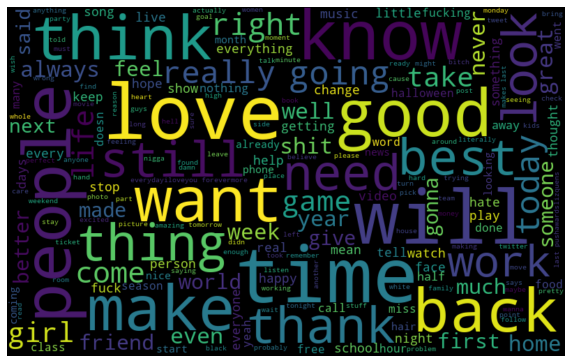

In [ ]:
words_human = ' '.join([text for text in df_associationRules['text'][df_associationRules['gender_trans']== 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_human)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

However, the higher frequency words under the non-human profile are more with 'weather,' 'channel,' 'updates,' etc., which are more related to the human profiles, and the polarity of the majority of words is neutral.

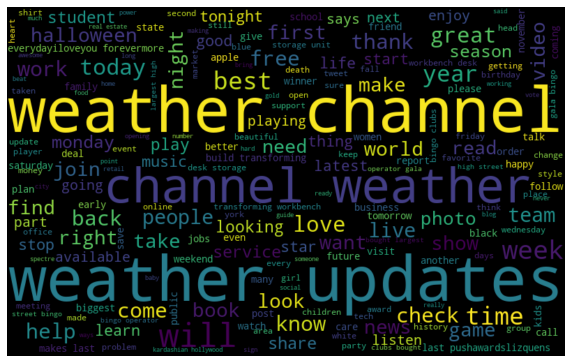

In [ ]:
words_non_human = ' '.join([text for text in df_associationRules['text'][df_associationRules['gender_trans']== 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_non_human)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

For further sentiment analysis for each tweet, we calculate the polarity and subjectivity of each tweet by using TextBlob. TextBolb is a python library, and we can use its API to conduct common Natural Language Processing (NLP) tasks, such as sentiment analysis. Polarity is a value change from -1 to 1, indicating whether the sentence is positive or negative. Subjectivity is another metric that ranges from 0 to 1, indicating if the sentence is about a fact or an opinion, objective or subjective (Li, Song, Zhang and Fox, 2022). After applying the TextBlob to each text, the polarity and subjectivity scores would be calculated automatically. Then, we would classify the polarities of each text as positive, neutral, and negative by comparing them with 0. Here, we assume the polarity of each text under human profiles is more positive or negative, which aligns with the human's feature. In contrast, for non-human profiles (brand profiles), most polarity would be neutral and positive.


Also, we plot the human/non-human sentiments to check the label counts under different categories. As shown from below bar charts, the total positive and negative sentiments under the human profile are much higher than those on the non-human profile. For the non-human profile, the neutral and positive sentiment takes 1st and 2nd place, with less text under the negative sentiment.  


Text(0.5, 1.0, 'non-human profile sentiments distribution')

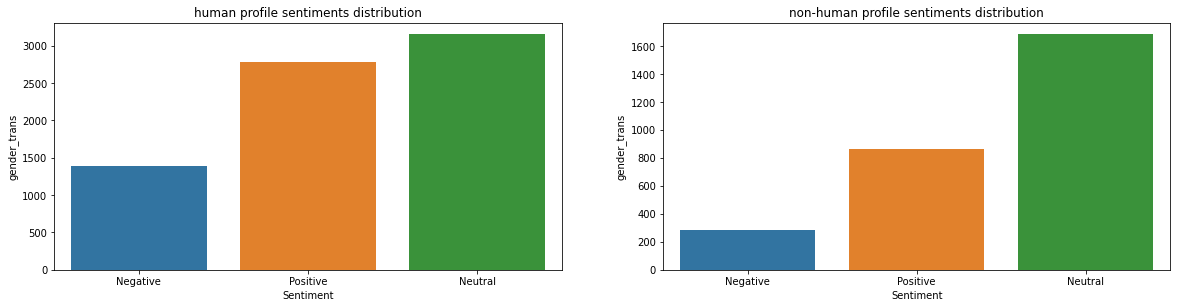

In [ ]:
counts_human = df_associationRules[df_associationRules['gender_trans'] == 0].groupby('Sentiment')['gender_trans'].count().reset_index()
counts_non_human = df_associationRules[df_associationRules['gender_trans'] == 1].groupby('Sentiment')['gender_trans'].count().reset_index()

# chart size
plt.figure(figsize=[20,10])

# plot human sentiments
plt.subplot(221)
ax_human = sns.barplot(x="Sentiment", y="gender_trans", data=counts_human, order=counts_human.sort_values("gender_trans").Sentiment)
plt.title("human profile sentiments distribution")

# plot non-human sentiments
plt.subplot(222)
ax_non_human = sns.barplot(x="Sentiment", y="gender_trans", data=counts_non_human, order=counts_non_human.sort_values("gender_trans").Sentiment)
plt.title("non-human profile sentiments distribution")

For association analysis, we would use the gender label name, favorite label name, tweet label name, and sentiment columns to discover the relevant association rules within these features. Also, in this step, we complete the one-hot encoding of the data and generate the frequent item sets that have at least 7% by using the apriori.

In [ ]:
# create an empty list
row_list = []
# Iterate over each row
for index, rows in df_associationRules.iterrows():
    # Create list for the current row
    # my_list =[row.user_timezone, rows.gender_label_name, rows.fav_label_name, row.link_color_check, rows.sidebar_color_check, rows.tweet_label_name, rows.Sentiment]
    my_list =[rows.gender_label_name, rows.fav_label_name, rows.tweet_label_name, rows.Sentiment]
    # append the list to the final list
    row_list.append(my_list)

# One Hot Encoding process has been done.
temp = TransactionEncoder()
temp_df = temp.fit(row_list).transform(row_list)
new_df = pd.DataFrame(temp_df,columns=temp.columns_)
new_df.head()

Negative  Neutral  Positive  high_fav_number  high_tweet_count  human  \
0     False     True     False            False             False   True   
1     False     True     False            False             False   True   
2     False    False      True            False             False   True   
3     False    False      True            False             False   True   
4     False    False      True             True              True   True   

   low_fav_number  low_tweet_count  medium_fav_number  medium_tweet_count  \
0            True            False              False               False   
1           False            False               True                True   
2           False             True               True               False   
3           False            False               True               False   
4           False            False              False               False   

   non-human  super_high_fav_number  super_high_tweet_count  
0      False                  False                    True  
1      False                  False                   False  
2      False                  False                   False  
3      False                  False                    True  
4      False                  False                   False

In [ ]:
# frequent items
frequent_itemsets = apriori(new_df, min_support=0.07, use_colnames=True)
frequent_itemsets.head()

support            itemsets
0  0.164270          (Negative)
1  0.475970           (Neutral)
2  0.359760          (Positive)
3  0.259110   (high_fav_number)
4  0.245913  (high_tweet_count)

This step is to generate the relevant rules with the corresponding support, confidence, and lift by using the association_rules.

In [ ]:
# generate rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()

antecedents         consequents  antecedent support  \
0             (human)          (Negative)            0.721095   
1          (Negative)             (human)            0.164270   
2  (high_tweet_count)           (Neutral)            0.245913   
3           (Neutral)  (high_tweet_count)            0.475970   
4    (low_fav_number)           (Neutral)            0.243746   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.164270  0.136301    0.189019  1.150661  0.017846    1.030518  
1            0.721095  0.136301    0.829736  1.150661  0.017846    1.638075  
2            0.475970  0.117688    0.478574  1.005471  0.000640    1.004994  
3            0.245913  0.117688    0.247258  1.005471  0.000640    1.001787  
4            0.475970  0.149301    0.612525  1.286899  0.033285    1.352423

To have a clear idea about the generated rules, we filtered the dataset by looking for lift(>1) and confidence(>0.8) and sorted the relevant rules with confidence from high to low.

In [ ]:
# filter the dataframe to check its relationships
rules[ (rules['lift'] > 1) &
       (rules['confidence'] > 0.8)].sort_values('confidence', ascending=False).head()

antecedents consequents  \
125  (high_tweet_count, super_high_fav_number)     (human)   
35                     (super_high_fav_number)     (human)   
63            (super_high_fav_number, Neutral)     (human)   
115          (Positive, super_high_fav_number)     (human)   
120      (medium_tweet_count, high_fav_number)     (human)   

     antecedent support  consequent support   support  confidence      lift  \
125            0.098089            0.721095  0.092377    0.941767  1.306023   
35             0.231830            0.721095  0.215186    0.928207  1.287219   
63             0.099665            0.721095  0.091590    0.918972  1.274412   
115            0.082726            0.721095  0.075931    0.917857  1.272866   
120            0.102029            0.721095  0.090211    0.884170  1.226149   

     leverage  conviction  
125  0.021646    4.789470  
35   0.048015    3.884864  
63   0.019721    3.442094  
115  0.016277    3.395364  
120  0.016638    2.407879

Meanwhile, we want to know what features are more related to human or non-human profiles. Thus, we filter the data frame by applying 'consequents' equal to 'human' and 'non-human.' It can be found from the rules that (low_fav_number, super_high_tweet_count, neutral) are more related to non-human profiles. In addition, (high_fav_number, positive, negative) are more related to human profiles. Thus, we select the rules with lift(>1) and confidence(>0.8) under the human/non-human profiles, and these rules will be used to validate the other parts and help find out the dataset's potential misinformation.

In [ ]:
rules_human = rules[(rules['consequents'] == {'human'}) & (rules['lift'] > 1)].sort_values('confidence', ascending=False)
rules_human.head(10)

antecedents consequents  \
125  (high_tweet_count, super_high_fav_number)     (human)   
35                     (super_high_fav_number)     (human)   
63            (super_high_fav_number, Neutral)     (human)   
115          (Positive, super_high_fav_number)     (human)   
120      (medium_tweet_count, high_fav_number)     (human)   
21                           (high_fav_number)     (human)   
45                  (high_fav_number, Neutral)     (human)   
84                 (Positive, high_fav_number)     (human)   
1                                   (Negative)     (human)   
90                (Positive, high_tweet_count)     (human)   

     antecedent support  consequent support   support  confidence      lift  \
125            0.098089            0.721095  0.092377    0.941767  1.306023   
35             0.231830            0.721095  0.215186    0.928207  1.287219   
63             0.099665            0.721095  0.091590    0.918972  1.274412   
115            0.082726            0.721095  0.075931    0.917857  1.272866   
120            0.102029            0.721095  0.090211    0.884170  1.226149   
21             0.259110            0.721095  0.225133    0.868871  1.204933   
45             0.109809            0.721095  0.094347    0.859193  1.191511   
84             0.102915            0.721095  0.087552    0.850718  1.179758   
1              0.164270            0.721095  0.136301    0.829736  1.150661   
90             0.085484            0.721095  0.070514    0.824885  1.143933   

     leverage  conviction  
125  0.021646    4.789470  
35   0.048015    3.884864  
63   0.019721    3.442094  
115  0.016277    3.395364  
120  0.016638    2.407879  
21   0.038290    2.126953  
45   0.015164    1.980757  
84   0.013340    1.868305  
1    0.017846    1.638075  
90   0.008872    1.592694

In [ ]:
rules_non_human = rules[(rules['consequents'] == {'non-human'}) & (rules['lift'] > 1)].sort_values('confidence', ascending=False)
rules_non_human.head()

antecedents  consequents  \
136  (super_high_tweet_count, low_fav_number)  (non-human)   
67                  (low_fav_number, Neutral)  (non-human)   
36                           (low_fav_number)  (non-human)   
79          (super_high_tweet_count, Neutral)  (non-human)   
42                   (super_high_tweet_count)  (non-human)   

     antecedent support  consequent support   support  confidence      lift  \
136            0.096514            0.278905  0.078097    0.809184  2.901289   
67             0.149301            0.278905  0.110301    0.738786  2.648883   
36             0.243746            0.278905  0.159346    0.653737  2.343944   
79             0.134134            0.278905  0.076916    0.573421  2.055975   
42             0.233701            0.278905  0.107938    0.461863  1.655986   

     leverage  conviction  
136  0.051179    3.779001  
67   0.068661    2.760556  
36   0.091364    2.082509  
79   0.039505    1.690416  
42   0.042757    1.339983

# 6 Classification

After labelling and analysing the dataset, what we need is to select classification model to verify the result. As implementation of classification can articulate the problem early, it means a lot in terms of our data quality, a high accuracy of a classification model can reflect in following perspectives: formatting data consistently, completion of data cleaning, rescale and normalization.

In this part, first of all, we will shuffle the dataset first, and split the data into training, validation, testing data, in order to reduce the potential overfitting problems to better evaluate the model's predicting performance.  

Secondly, we will simply use for loop to implement a set of classification algorithms in our training set, by comparing the accuracy of each model, we select the best algorithms for the next data exploration.

Thirdly, we implement those two models, and get the result, compare and analyse the results.

## 6.1 Shuffle

In [ ]:
X = df_trust[[text_col, description_col, name_col, topic_1_col, topic_2_col, topic_3_col] + num_col + cat_col]
y = df_trust['cluster']
X, y = sklearn.utils.shuffle(X, y)

## 6.2 Split data set

In [ ]:
X_train,X_val,y_train,y_val_test = train_test_split(X,y,test_size=0.4,random_state=0, stratify=y)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val_test,test_size=0.5,random_state=0)

X_train = cols_trans.fit_transform(X_train).toarray()
X_val = cols_trans.transform(X_val).toarray()
X_test = cols_trans.transform(X_test).toarray()

In [ ]:
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In this part we implement a set of classification algorithm in training dataset, from the result shows, desicion tree, logistic regression, random forest, naive bay provides the best performance in training dataset, so we will choose two algorithms for a deeper digging out in testing and validation dataset.

For comparation purpose, we choose one discriminative classifier—logistic regression, and one generative classifier—naïve bay.

In [ ]:
MLA = [
    linear_model.LogisticRegression(),
    ensemble.RandomForestClassifier(),
    linear_model.SGDClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    discriminant_analysis.QuadraticDiscriminantAnalysis()
]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
# MLA_predict = df_datasets["label"]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    # classifier = OneVsRestClassifier(alg,n_jobs=-1)

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

    # alg.fit(df_datasets[data1_x_bin], df_datasets[Target])
    # MLA_predict[MLA_name] = alg.predict(df_datasets[data1_x_bin])

    row_index += 1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

MLA Name  \
6         DecisionTreeClassifier   
2                  SGDClassifier   
0             LogisticRegression   
5           KNeighborsClassifier   
1         RandomForestClassifier   
4                     GaussianNB   
3                    BernoulliNB   
7  QuadraticDiscriminantAnalysis   

                                      MLA Parameters MLA Train Accuracy Mean  \
6  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                     1.0   
2  {'alpha': 0.0001, 'average': False, 'class_wei...                0.999849   
0  {'C': 1.0, 'class_weight': None, 'dual': False...                     1.0   
5  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                0.999243   
1  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...                     1.0   
4           {'priors': None, 'var_smoothing': 1e-09}                     1.0   
3  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...                 0.98846   
7  {'priors': None, 'reg_param': 0.0, 'store_cova...                0.901778   

  MLA Test Accuracy Mean MLA Test Accuracy 3*STD   MLA Time  
6               0.999546                0.001505   0.464743  
2               0.999319                0.001589   0.578535  
0               0.999017                0.002879   1.198417  
5               0.998941                0.002314   0.073723  
1               0.991377                0.005389   4.269235  
4               0.987973                  0.0047   0.330263  
3                0.98767                0.005375   0.243597  
7                0.02708                0.033945  35.817869

## 6.3 Logistic Regression

Logistic regression is good at fitting linear relationships, suitable for the data with a strong linear relationship between features and labels. As logistic regression is a generalized linear model, so it has a lot in common with linear regression. Their model forms are basically the same, both have w'x+b, where w and b are parameters to be determined, the difference is that their dependent variables are different, and linear regression directly uses w'x+b as the dependent variable, that is, y =w'x+b, and logistic regression uses the function L to correspond w'x+b to a hidden state p, p =L(w'x+b), and then determines the dependent variable according to the size of p and 1-p value.  

In [ ]:
# Consider the data imbalance problem
LR_estimator = LogisticRegression(class_weight= 'balanced', random_state = 4)
LR_estimator.fit(X_train, y_train)
LR_y_predict = LR_estimator.predict(X_test)
LR_score = LR_estimator.score(X_test, y_test) * 100
print("Test accuracy with regression: {0:.2f}%".format(LR_score))

LR_y_val = LR_estimator.predict(X_val)
LR_val_score = LR_estimator.score(X_val, y_val) * 100
print("Validate accuracy with regression: {0:.2f}%".format(LR_val_score))

Test accuracy with regression: 99.93%
Validate accuracy with regression: 99.93%


In [ ]:
print(f'Confusion Matrix of test set: \n{confusion_matrix(y_test, LR_y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, LR_y_predict)}')
print(f'Recall score: {recall_score(y_test,LR_y_predict)}')
print()
print(f'Confusion Matrix of validation set: \n{confusion_matrix(y_val, LR_y_val)}')
print(f'Area Under Curve: {roc_auc_score(y_val, LR_y_val)}')
print(f'Recall score: {recall_score(y_val,LR_y_val)}')

Confusion Matrix of test set: 
[[1455    1]
 [   0   13]]
Area Under Curve: 0.9996565934065934
Recall score: 1.0

Confusion Matrix of validation set: 
[[1445    1]
 [   0   23]]
Area Under Curve: 0.9996542185338866
Recall score: 1.0


## 6.4 Naive Bayes

“A good classification algorithm features with less errors in data classification. A classification algorithm can exhibit errors mainly due to three reasons: the noise in the initial sample, statistical bias, and the variance (Friedman and Goldszmidt 1996). Robustness of a classification algorithm refers to the tolerance of the algorithm for errors, during the execution (Carbin and Rinard 2010; Danglot et al. 2018). One of the main features of NB classification technique is the robustness.” (Wickramasinghe, Indika, and Harsha Kalutarage, 2021)



In this experiment, we will also implement naïve bay, which assumes the dataset still have some error, what the best result would be. The satisfactory performance will imply that the way we label the dataset is reasonable.  

In [ ]:
nb_estimator = GaussianNB()
nb_estimator.fit(X_train, y_train)
nb_y_predict = nb_estimator.predict(X_test)
nb_score = nb_estimator.score(X_test, y_test) * 100
print("Test accuracy with GaussianNB: {0:.2f}%".format(nb_score))

nb_y_val = nb_estimator.predict(X_val)
nb_val_score = nb_estimator.score(X_val, y_val) * 100
print("Validate accuracy with GaussianNB: {0:.2f}%".format(nb_val_score))


Test accuracy with GaussianNB: 99.05%
Validate accuracy with GaussianNB: 99.32%


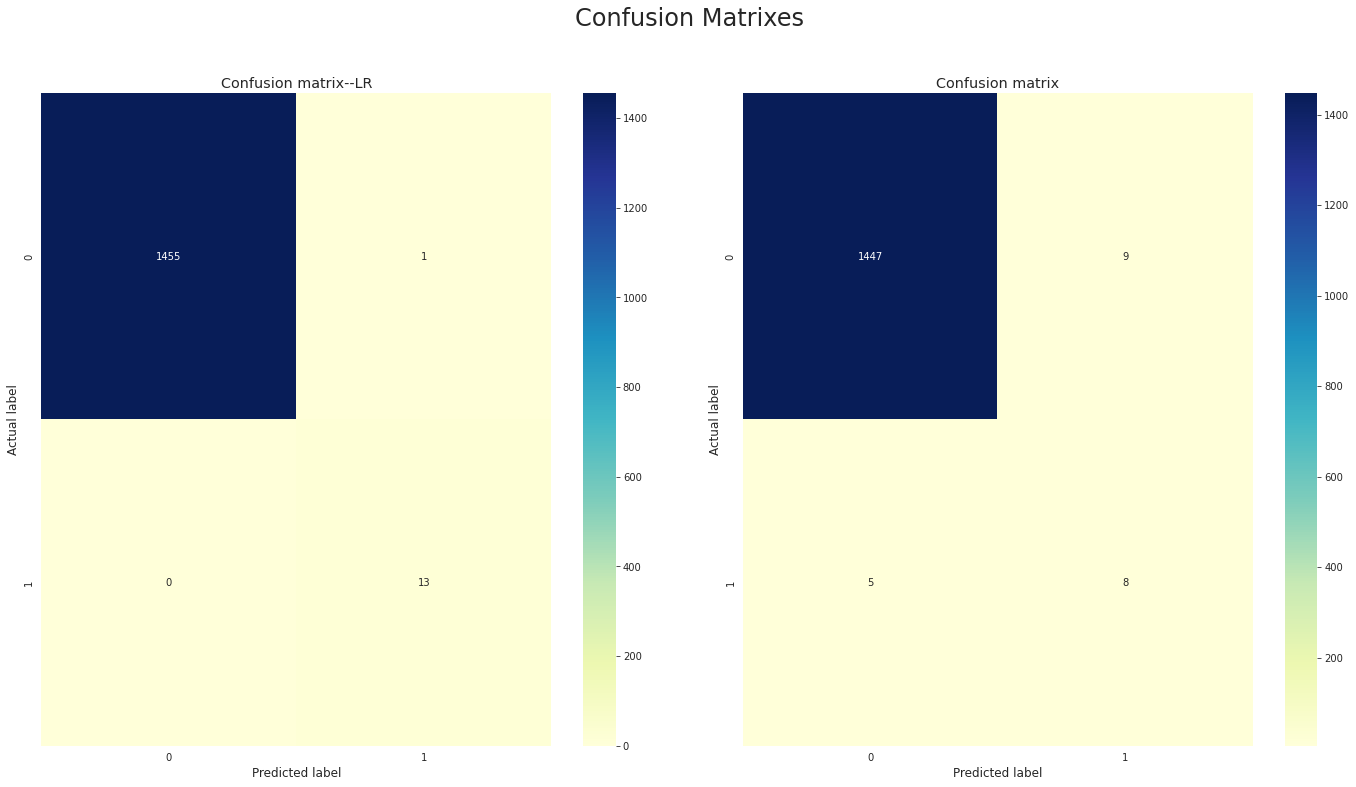

In [ ]:
plt.figure(figsize=(20,8))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.1)

plt.subplot(1,2,1)
# metrics.plot_confusion_matrix(estimator, X_test, y_test)
cnf_matrix = metrics.confusion_matrix(y_test, LR_y_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix--LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(1,2,2)
# metrics.plot_confusion_matrix(estimator, X_test, y_test)
nb_cnf_matrix = metrics.confusion_matrix(y_test, nb_y_predict)
nb_p = sns.heatmap(pd.DataFrame(nb_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# plt.subplot(1,3,3）
# cm_rf = metrics.confusion_matrix(y_test,nb_y_predict)
# plt.title("Random Forest Confusion Matrix")
# sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

After implementing two classification, both algorithm can achieve impressive performance, naive bay has a high accuracy which up to 99.8%, the logistic regression performs even better accuracy, precision, recall, f1-score all up to 1.
that means the in the data preprocess, the data has been handled very well, therefore no matter which classification method been used can provide a ideal result.
but one thing worthy to be noticed is naive bay's performance not as good as logistic regression, especially in percision of cluster 1, which only 64%, recall only 54%, f1-score just 58%.




In [ ]:
print(metrics.classification_report(y_test, LR_y_predict))
print(metrics.classification_report(y_test, nb_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1456
           1       0.93      1.00      0.96        13

    accuracy                           1.00      1469
   macro avg       0.96      1.00      0.98      1469
weighted avg       1.00      1.00      1.00      1469

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1456
           1       0.47      0.62      0.53        13

    accuracy                           0.99      1469
   macro avg       0.73      0.80      0.76      1469
weighted avg       0.99      0.99      0.99      1469



The reason why naive bayes slightly underperform logistic regression may related to our dataset.  

Reason 1  

“More precisely, they proposed that the discriminative classifier had lower asymptotic error rate while the generative classifier may approach its (higher) asymptotic error rate much faster. In other words, the discriminative classifier performs better with larger training sets while the generative classifier does better with smaller training sets.” (Xue, Jing-Hao, and D. Michael Titterington, 2008)

The size of data set would affect the results, as logistic regression is discriminative classifier can handle big size of data better than naïve bay (generative classifier) because of asymptotic error rate.  
  

Reason 2   

Naive Bayes classifier assumes that each feature is independent of each other, but in our dataset, the frequency of occurrence of different words is often not independent of each other, as some words are highly related to each other, sometimes occurrence of one word means the high chance of occurrence another words.  

Reason 3

As logistic regression is good at fitting linear relationships, that means our dataset has a strong linear relationship between features and labels.

  

## 6.5 Predict the gender of the remaining dataset using Logistic Regression

In [ ]:
# Predict the gender of the remaining dataset
df_remaining = df.drop(df_trust.index)
# df_remaining = df_clean.drop(df_trust.index)

df_remaining.shape

(6529, 35)

In [ ]:
df_remaining["gender_trans"].value_counts()

1    4452
0    2077
Name: gender_trans, dtype: int64

In [ ]:
df_predict = df_remaining[[text_col, description_col, name_col, topic_1_col, topic_2_col, topic_3_col] + num_col+cat_col]
df_predict = cols_trans.transform(df_predict)

df_remaining['lr_predict_gender'] = LR_estimator.predict(df_predict)

# Select the dataset in which the predicted gender doesn't match with the given gender.
# Misinformation will be from this dataset
df_selected = df_remaining[(df_remaining["gender_trans"] != df_remaining["lr_predict_gender"])]
df_selected.shape

(4495, 36)

In [ ]:
# Find the data violating one of the association rules and they can be considered as misinformation
df_mis = df_selected[((df_selected['fav_label'] == 2) & (df_selected['gender_trans'] == 1))
 | ((df_selected['Sentiment'] == 2) & (df_selected['gender_trans'] == 1))
 | ((df_selected['tweet_label'] == 2) &  (df_selected['Sentiment'] == 1) & (df_selected['gender_trans'] == 1))
 | ((df_selected['tweet_label'] == 3) &  (df_selected['fav_label'] == 0) & (df_selected['gender_trans'] == 0))
]
df_mis

gender  gender:confidence             created  \
6       brand             0.7002 2011-11-16 17:14:00   
7       brand             1.0000 2015-02-22 20:06:00   
11     female             1.0000 2015-10-03 21:32:00   
28      brand             1.0000 2009-03-13 13:13:00   
33      brand             1.0000 2013-06-26 14:05:00   
...       ...                ...                 ...   
13810    male             1.0000 2014-02-11 14:08:00   
13836   brand             0.3418 2010-06-07 04:38:00   
13848   brand             1.0000 2014-09-19 08:08:00   
13869   brand             1.0000 2009-04-06 16:54:00   
13897   brand             0.6364 2014-06-08 19:07:00   

                                             description  fav_number  \
6      clean food that tastes great while providing e...         516   
7                          highly extraordinary auctions           0   
11                                                                 0   
28     our nation   s leading voice for childcare adv...         764   
33     love animals fetchfind is the new way to find ...         711   
...                                                  ...         ...   
13810                      love being a dad love bowling           1   
13836   i love emma watson mila kunis and ashton kutcher        1235   
13848                  forex cfd  s metalfuturebitcoins            5   
13869                                everything winnipeg       14771   
13897  reviews of delectable food picturesque travel ...         536   

      link_color             name sidebar_color  \
6         0084B4    blissful eats        C0DEED   
7         0084B4     eliseotecleo        C0DEED   
11        0084B4             sith        C0DEED   
28        EE3124     usachildcare        FFFFFF   
33        0084B4        fetchfind        C0DEED   
...          ...              ...           ...   
13810     0084B4       grayranier        C0DEED   
13836     0084B4       kuku emmaw        FFFFFF   
13848     2FC2EF   pegassusbroker        181A1E   
13869     0084B4       gbuschrist        C0DEED   
13897     A30000  hedonistshednst        948C75   

                                                    text  tweet_count  ...  \
6                                   taking care yourself         5179  ...   
7       deals rank magic seventh prio secret rare unlimi        66684  ...   
11                                                              44421  ...   
28     here julia will combat stigma associated with ...         5309  ...   
33     walkers needed from south loop edgewater midda...        13131  ...   
...                                                  ...          ...  ...   
13810                     something completely different       553681  ...   
13836     mila kristen friends while ashton also friends        15746  ...   
13848                   thank your comments welcome site        32303  ...   
13869  call that great deal meanwhile buffalo kane go...        17851  ...   
13897                     best bloody mary brunch nycwff         5900  ...   

       sidebar_color_warm                                         descrption  \
6                       0  clean food that tastes great while providing e...   
7                       0                      highly extraordinary auctions   
11                      0                                                      
28                      1  nation leading voice childcare advocating affo...   
33                      0  love animals fetchfind find jobs network indus...   
...                   ...                                                ...   
13810                   0                            love being love bowling   
13836                   1         love emma watson mila kunis ashton kutcher   
13848                   0                          forex metalfuturebitcoins   
13869                   0                                everything winnipeg   
13897                   1  reviews dele

# 7 Comparison of Misinformation

First, we have a look at the number of inconsistencies between the original data and our label. There are 1150 human tags and 62 non-human tags. That is, there are 1088+62=1150 mis information in total.

In [ ]:
# df_mis = df_1[df_1['cluster']!=df_1['gender_trans']]
len(df_mis)

1150

In [ ]:
df_mis['gender_trans'].value_counts()

1    1088
0      62
Name: gender_trans, dtype: int64

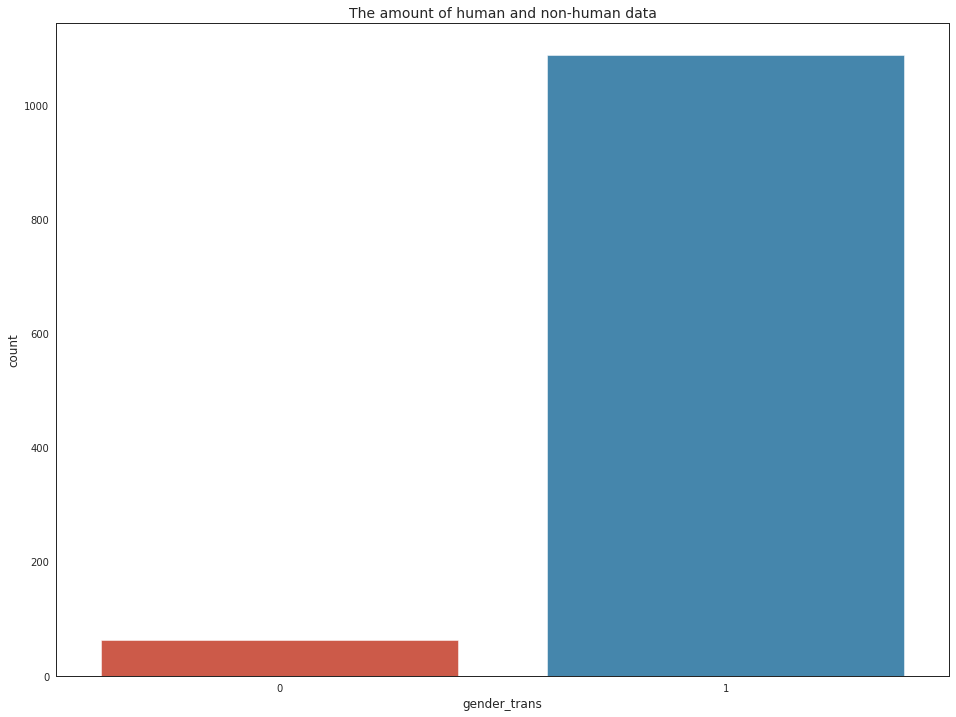

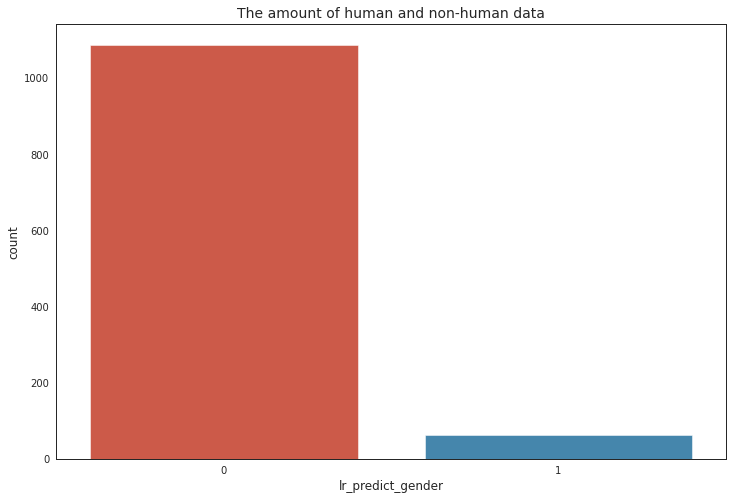

In [ ]:
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
# create a countplot to visualize the amount of human and non-human data
sns.countplot(df_mis['gender_trans'],label="Gender")
plt.title("The amount of human and non-human data", fontdict={'fontsize':14})

plt.subplot(1,2,2)
# create a countplot to visualize the amount of human and non-human data
sns.countplot(df_mis['lr_predict_gender'], label="lr_predict_gender")
plt.title("The amount of human and non-human data", fontdict={'fontsize':14})
plt.show()

Then let's look at the law of data distribution. In general, the average confidence of the original data is 0.861278, which seems to be relatively high, indicating that the accuracy of the mis information we finally identified may not be high enough. It can be thought that the possible reason is that our model design is not good enough. For example, we use cluster labels, and then proceed to the next step according to the labels. But in this step, we can use multiple models to label and compare them, and then select the most reliable data and models according to the principle of majority voting.

Next, we will analyze the data in detail.

In [ ]:
df_mis.describe()

gender:confidence     fav_number   tweet_count  user_timezone  \
count        1150.000000    1150.000000  1.150000e+03    1150.000000   
mean            0.859187    2460.841739  4.875999e+04       0.671304   
std             0.196596    9825.229529  1.228425e+05       0.469943   
min             0.333000       0.000000  3.000000e+00       0.000000   
25%             0.669450       6.000000  4.104500e+03       0.000000   
50%             1.000000     638.000000  1.382100e+04       1.000000   
75%             1.000000    1639.500000  3.832200e+04       1.000000   
max             1.000000  219586.000000  1.302658e+06       1.000000   

             delta  daily_tweet_count  gender_trans    fav_label  tweet_label  \
count  1150.000000        1150.000000   1150.000000  1150.000000  1150.000000   
mean   1255.615652         111.913913      0.946087     1.392174     1.611304   
std     844.897700         336.906206      0.225944     1.011737     1.046879   
min       0.000000           0.000000      0.000000     0.000000     0.000000   
25%     472.000000           3.000000      1.000000     0.000000     1.000000   
50%    1200.000000          13.000000      1.000000     2.000000     2.000000   
75%    2030.750000          44.750000      1.000000     2.000000     2.000000   
max    3125.000000        2594.000000      1.000000     3.000000     3.000000   

       daily_tweet_label  ...  sidebar_color_b  link_color_warm  \
count        1150.000000  ...      1150.000000      1150.000000   
mean            1.553913  ...       230.157391         0.200870   
std             1.076757  ...        44.942885         0.400825   
min             0.000000  ...         0.000000         0.000000   
25%             1.000000  ...       237.000000         0.000000   
50%             2.000000  ...       237.000000         0.000000   
75%             2.000000  ...       255.000000         0.000000   
max             3.000000  ...       255.000000         1.000000   

       sidebar_color_warm     polarity  subjectivity    Sentiment  \
count         1150.000000  1150.000000   1150.000000  1150.000000   
mean             0.402609     0.037566      0.406236     1.141739   
std              0.490637     0.329690      0.304183     0.779355   
min              0.000000    -1.000000      0.000000     0.000000   
25%              0.000000    -0.125000      0.100000     1.000000   
50%              0.000000     0.000000      0.400000     1.000000   
75%              1.000000     0.200000      0.622917     2.000000   
max              1.000000     1.000000      1.000000     2.000000   

           topic_1      topic_2      topic_3  lr_predict_gender  
count  1150.000000  1150.000000  1150.000000        1150.000000  
mean      0.287664     0.409943     0.302393           0.053913  
std       0.059028     0.063754     0.064103           0.225944  
min       0.164605     0.250063     0.157173           0.000000  
25%       0.245526     0.365196     0.255832           0.000000  
50%       0.282255     0.407922     0.291458           0.000000  
75%       0.322062     0.452855     0.336629           0.000000  
max       0.501167     0.625294     0.552006           1.000000  

[8 rows x 25 columns]

It can be seen from the emotional analysis column that the proportion of human characters neutral in the original label is relatively higher than that of non-human characters, which is not in line with our hypothesis. Therefore, according to our hypothesis, if you want to modify the configuration, you should turn the human content to positive or negative, and non-human content to neutral.

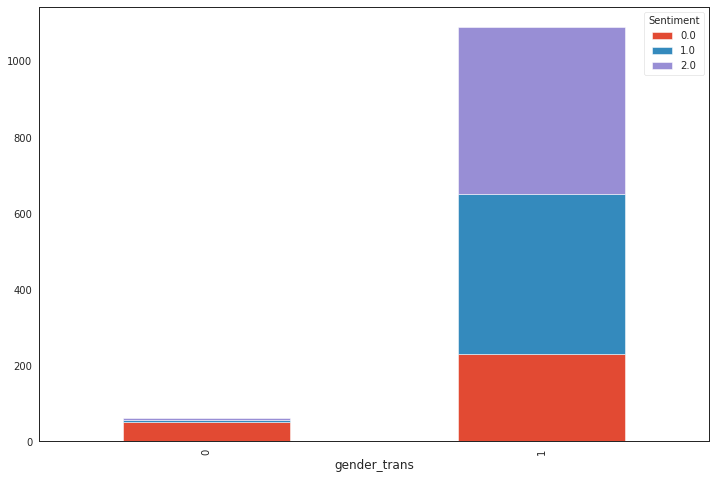

In [ ]:
# plot the stacked categories graph for different clusters
# 0: Neutral, 1: Positive, 2: Negative
# df_plot = df_mis.groupby(["cluster","Sentiment"]).size().reset_index().pivot(columns="Sentiment",index="cluster",values=0)
# df_plot.plot(kind="bar",stacked=True)
#
df_plot = df_mis.groupby(["gender_trans","Sentiment"]).size().reset_index().pivot(columns="Sentiment",index="gender_trans",values=0)
df_plot.plot(kind="bar",stacked=True)

From the perspective of daily tweets, the average daily tweets of humans in the original data set are lower than those of non-humans in the low frequency range, which does not conform to our hypothesis. Because the brand's account needs to be frequently tweeted to maintain its activity, it is impossible for a large number of accounts not to send documents.

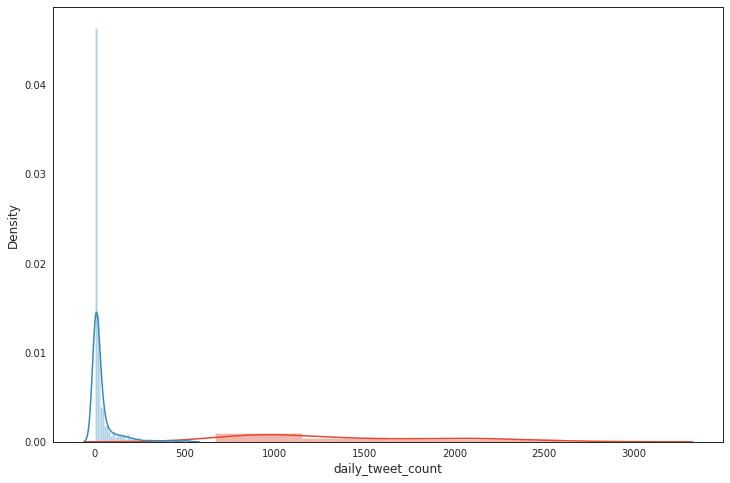

In [ ]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.distplot(df_mis[df_mis['gender_trans']==0].daily_tweet_count)
plt.xlabel('daily_tweet_count of human')

plt.subplot(1,2,2)
sns.distplot(df_mis[df_mis['gender_trans']==1].daily_tweet_count)
plt.xlabel('daily_tweet_count of non-human')
plt.show()

It can be seen from the histogram that human accounts in the original dataset were created more recently. This is in line with our hypothesis. Because the brand will be forward-looking, it will flood into tweets to promote itself in the early stage.

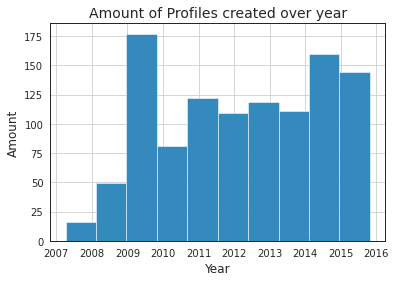

In [ ]:
plt.figure(figsize=[18,6])
# create a histogram to visualize the amount of profiles created over year
plt.subplot(1,2,1)
df_mis[df_mis['gender_trans']==0]['created'].hist()
plt.title("Amount of Profiles created over year by human", fontdict={'fontsize':14})
plt.xlabel('Year')
plt.ylabel('Amount')

plt.subplot(1,2,2)
df_mis[df_mis['gender_trans']==1]['created'].hist()
plt.title("Amount of Profiles created over year by non-human", fontdict={'fontsize':14})
plt.xlabel('Year')
plt.ylabel('Amount')

plt.show()

It can be seen from the graph that the proportion of low likes in human labels in the original data is very high, but there are few values in other intervals. In non-human, the proportion of data with high likes range is high. This is in conflict with our assumption. We think that people prefer to interact more, and the brand side, as an official account, will less like it.

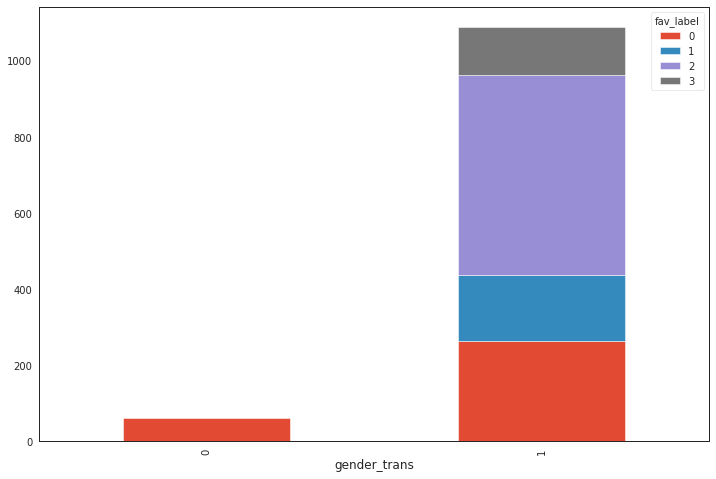

In [ ]:
df_plot = df_mis.groupby(["gender_trans","fav_label"]).size().reset_index().pivot(columns="fav_label",index="gender_trans",values=0)
df_plot.plot(kind="bar",stacked=True)

According to our assumption, when setting link color, ordinary users prefer more hot colors, while brands prefer more neutral or cold colors. When the same user sets the link color and sidebar color, the style should be the same generally. From the figure, we can see that the non-human configuration in the original data is different, and there may be some abnormal data.

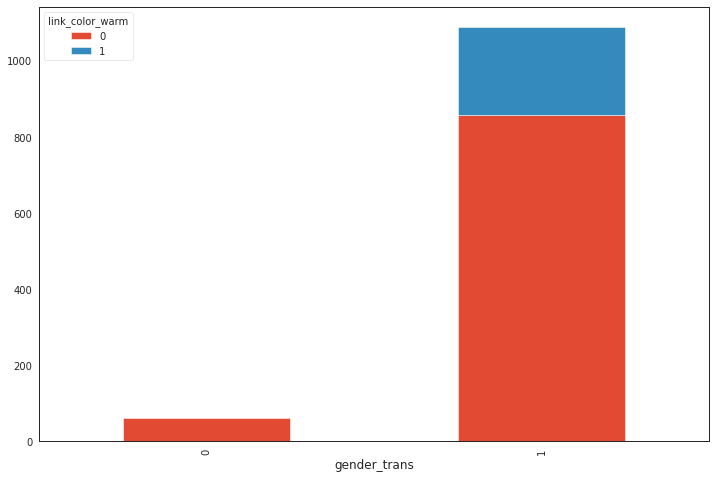

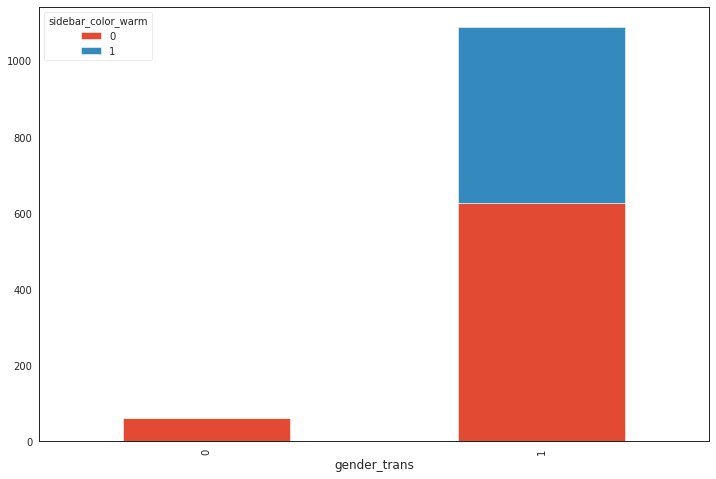

In [ ]:
plt.figure(figsize=[18,6])
df_plot = df_mis.groupby(["gender_trans","link_color_warm"]).size().reset_index().pivot(columns="link_color_warm",index="gender_trans",values=0)
df_plot.plot(kind="bar",stacked=True)
plt.show()
df_plot = df_mis.groupby(["gender_trans","sidebar_color_warm"]).size().reset_index().pivot(columns="sidebar_color_warm",index="gender_trans",values=0)
df_plot.plot(kind="bar",stacked=True)
plt.show()

From the word cloud diagram of text, we can see that the words often used by human in the original data are makes,last, everyday, forevermore most of which are commonly used in people's daily communication. The common words used by non-human are love, best, thank, will, life, back, going, etc. Most of them are in line with the use of brand marketing.

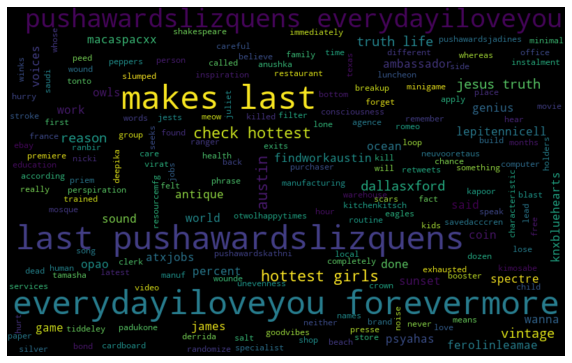

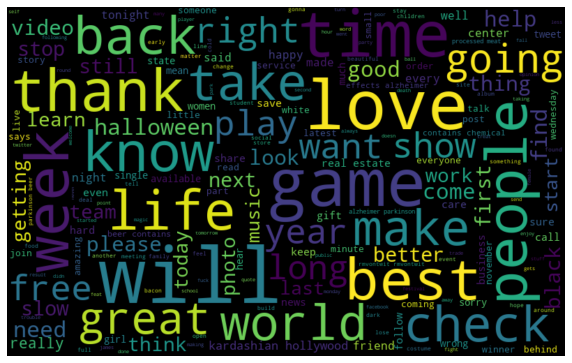

In [ ]:
words_1 = ' '.join([text for text in df_mis[df_mis['gender_trans']== 0]['text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

# Evaluate the word count in the text column
all_words_text = ' '.join([text for text in df_mis[df_mis['gender_trans']== 1]['text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

From the word cloud diagram of description, we can see that the words commonly used by human in the original data are view, mention, must, mention, website, etc. Most of them are in line with the commonly used description words. The common words used by non-human are life, love, new, heart, and love. Most of them are commonly used descriptive words in line with brand marketing, but it seems that love and family are not.

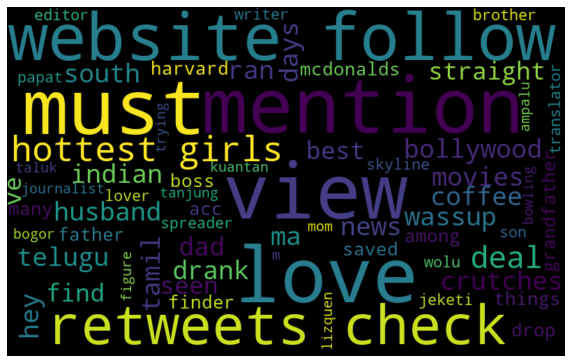

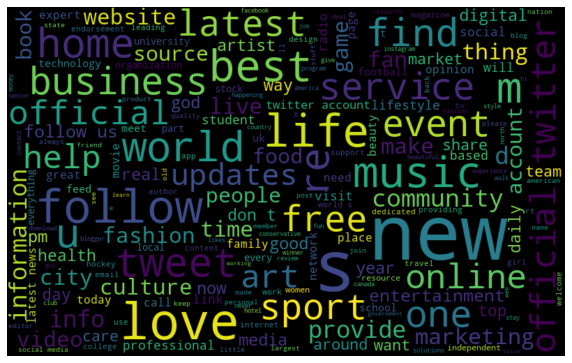

In [ ]:
words_0 = ' '.join([description for description in df_mis[df_mis['gender_trans']== 0]['description']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

words_1 = ' '.join([description for description in df_mis[df_mis['gender_trans']== 1]['description']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the feature of name, human's word cloud has more occurrences of austin palstacy, fkittlerbot, sith, etc. In the non-human word cloud, jcsb, lkth, lktc, jcsc, etc. appear more frequently.

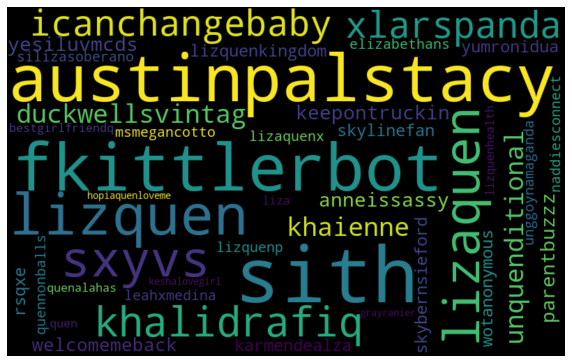

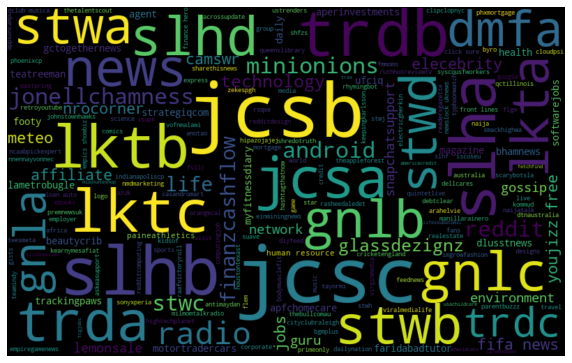

In [ ]:
words_0 = ' '.join([name for name in df_mis[df_mis['gender_trans']== 0]['name']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

words_1 = ' '.join([name for name in df_1['name'][df_1['gender_trans']== 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 8 Conclusion

According to the analysis results of many aspects, we design and implement the model. Some of the data generated by others caused us to give up, while others were found not applicable to the current scenario after analysis. For example, we tried to convert the avatar into a histogram, and then used the histogram data of the image for clustering and classification. However, due to the network restrictions, we spent a lot of time not acquiring valid images, and the resulting images were missing and could not be used for data mining analysis. Finally, we used several features that are most relevant to the human profile: description, link_color, sidebar_color, name, text. We analyze the word frequency of the text column and extract the TF-IDF features of the text. Abnormal value processing, null value processing, conversion to interval value and other operations are performed on the numeric column. The color column is converted from hexadecimal to RGB format after exception value processing. Then, the processed data is used for clustering, and the data with similar characteristics are aggregated together to generate two categories of human and non-human profiles, respectively.

Based on the analysis of the final results, we propose the following method to convert human to non-human configuration. If the reverse operation is performed, it is the non-human to human configuration method:
1. You can use the account created earlier by human to convert it into a brand account for marketing. Account purchase is not recommended.
2. You can use more neutral or cool colors when setting the link color, and then maintain the same style as the link color when setting the sidebar color.
3. You can post more tweets and interact with users every day to increase fav_ number.
4. When tweeting, post more marketing content and add keywords corresponding to brand marketing. The content of the article should be as fixed as possible and neutral.
5. Change the description to more relevant description of the brand.
6. The name can be changed into the brand name, which has higher recognition and accuracy.
7. At the same time, you can set the avatar as the brand logo or mascot.

Although we have done a lot of work, there are still many possibilities for us to imagine and deal with problems. We also explored two models. The first is to use the same training set with data preprocessing, and then use different machine learning models to train and label, and then select the trusted label through comparative voting, and finally compare the mis information. The second way is to preprocess the data set, use the clustering model and association rule model for preliminary feature analysis, take out the cluster label with confidence level of 1 and consider it as highly trusted data, then use the data set for classification model training, and compare the final classification label results with information. Each model has different considerations and different effects. In the future, we will try more different machine learning algorithms to build better mining results.

# Reference

G. Colavizza, M. Franceschet , 2016. Clustering citation histories in the Physical Review . Journal of Informetrics, Issue 4/10.

Li, L., Song, Z., Zhang, X. and Fox, E., 2022. A Hybrid Model for Role-related User Classification on Twitter. [online] arXiv.org. Available at: <https://arxiv.org/abs/1811.10202> [Accessed 20 September 2022].

Nlp.stanford.edu. 2009. Stemming and lemmatization. [online] Available at: <https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html> [Accessed 21 September 2022].

Sayyadiharikandeh, M., Luca Ciampaglia, G. and Flammini, A. (n.d.). Cross-domain gender detection in Twitter. [online] Available at: https://glciampaglia.com/docs/papers/genderdetection_chasm.pdf [Accessed 22 Sep. 2022].

Scott, W., 2019. TF-IDF for Document Ranking from scratch in python on real world dataset. [online] Medium. Available at: <https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089> [Accessed 21 September 2022].

Shah, P., 2020. My Absolute Go-To for Sentiment Analysis — TextBlob.. [online] Medium. Available at: <https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524> [Accessed 21 September 2022].

Scikit-learn. n.d. sklearn.feature_extraction.text.TfidfVectorizer. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html> [Accessed 21 September 2022].

Wickramasinghe, Indika, and Harsha Kalutarage, 2021. Naive Bayes: applications, variations and vulnerabilities: a review of literature with code snippets for implementation. Soft Computing.

Xue, Jing-Hao, and D. Michael Titterington, 2008. Comment on “on discriminative vs. generative classifiers: A comparison of logistic regression and naive bayes. Neural processing letters.